```
---
title: Small molecules in BioPAX: Reactome use case
tags: BioPAX, smallMolecules, redundancy, SPARQL, Reactome, ChEBI
lang: en
version: 0.19
date: 2023-06-08
---
```

In [1]:
import importlib
import json
import matplotlib.pyplot as plt
import networkx as nx
import os
import pandas
import rdflib
import rdflib.namespace
import sparqldataframe
from SPARQLWrapper import SPARQLWrapper, JSON
import sys

In [11]:
reactomeVersion = 84 # was 81
chebiVersion = 222 # was 219 # was 207
#endpointURL = "http://localhost:3030/reactome/query"
#endpointURL = "http://localhost:3030/chebi/query"
endpointURL = "http://localhost:3030/reactomeChEBI/query"
rdfFormat = "turtle"

In [12]:
prefixes = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcterms: <http://purl.org/dc/terms/>

PREFIX chebi: <http://purl.obolibrary.org/obo/chebi/>
PREFIX chebidb: <http://purl.obolibrary.org/obo/CHEBI_>
PREFIX chebirel: <http://purl.obolibrary.org/obo/CHEBI#>
PREFIX oboInOwl: <http://www.geneontology.org/formats/oboInOwl#>

PREFIX bp3: <http://www.biopax.org/release/biopax-level3.owl#>

# Homo_sapiens-20170221.owl
#PREFIX reactome: <http://www.reactome.org/biopax/59/48887#> 
#
# Homo_sapiens-20210608.owl
#PREFIX reactome: <http://www.reactome.org/biopax/77/48887#>
#
# Homo_sapiens-20220614.owl
#PREFIX reactome: <http://www.reactome.org/biopax/81/48887#>
#
# Homo_sapiens-20221130.owl
#PREFIX reactome: <http://www.reactome.org/biopax/83/48887#>

PREFIX reactome: <http://www.reactome.org/biopax/{}/48887#>
""".format(reactomeVersion)

# Outline

1. Molecule representation in BioPAX
2. Small molecule references in BioPAX
3. Mappings To ChEBI 

# bp3:SmallMolecule

In [4]:
query="""
# All small molecules

SELECT (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0        5083

In [5]:
query="""
# All relations applicable to small molecules

SELECT DISTINCT ?rel
WHERE {
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  ?molecule ?rel ?val .
}"""
sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print(result["rel"]["value"])

http://www.biopax.org/release/biopax-level3.owl#name
http://www.biopax.org/release/biopax-level3.owl#entityReference
http://www.biopax.org/release/biopax-level3.owl#comment
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.biopax.org/release/biopax-level3.owl#cellularLocation
http://www.biopax.org/release/biopax-level3.owl#dataSource
http://www.biopax.org/release/biopax-level3.owl#displayName
http://www.biopax.org/release/biopax-level3.owl#xref
http://www.biopax.org/release/biopax-level3.owl#memberPhysicalEntity


In [6]:
query="""
# Domain of the bp3:feature relation

SELECT DISTINCT ?sType
WHERE {
  ?s bp3:feature ?o .
  ?s rdf:type ?sType .
}"""

sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print(result["sType"]["value"])

http://www.biopax.org/release/biopax-level3.owl#Protein
http://www.biopax.org/release/biopax-level3.owl#Rna
http://www.biopax.org/release/biopax-level3.owl#Dna


In [7]:
query="""
# Cellular locations of small molecules

SELECT DISTINCT ?molecule ?cellLoc ?rel ?val
WHERE {
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  ?molecule bp3:name "cholesterol" .
  ?molecule bp3:cellularLocation ?cellLoc .
  ?cellLoc ?rel ?val .
}"""
sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print(result["molecule"]["value"] + " -> " + result["cellLoc"]["value"])
    print("  " + result["rel"]["value"] + " -> " + result["val"]["value"])
    print()

http://www.reactome.org/biopax/83/48887#SmallMolecule3471 -> http://www.reactome.org/biopax/83/48887#CellularLocationVocabulary26
  http://www.w3.org/1999/02/22-rdf-syntax-ns#type -> http://www.biopax.org/release/biopax-level3.owl#CellularLocationVocabulary

http://www.reactome.org/biopax/83/48887#SmallMolecule3471 -> http://www.reactome.org/biopax/83/48887#CellularLocationVocabulary26
  http://www.biopax.org/release/biopax-level3.owl#term -> transport vesicle membrane

http://www.reactome.org/biopax/83/48887#SmallMolecule3471 -> http://www.reactome.org/biopax/83/48887#CellularLocationVocabulary26
  http://www.biopax.org/release/biopax-level3.owl#xref -> http://www.reactome.org/biopax/83/48887#UnificationXref4657

http://www.reactome.org/biopax/83/48887#SmallMolecule4020 -> http://www.reactome.org/biopax/83/48887#CellularLocationVocabulary10
  http://www.w3.org/1999/02/22-rdf-syntax-ns#type -> http://www.biopax.org/release/biopax-level3.owl#CellularLocationVocabulary

http://www.reacto

In [8]:
query="""
# Cellular locations of small molecules

SELECT DISTINCT ?molecule ?physEntity ?rel ?val
WHERE {
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  #?molecule bp3:name "cholesterol" .
  ?molecule bp3:memberPhysicalEntity ?physEntity .
  ?physEntity ?rel ?val .
}
LIMIT 10
"""

sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print(result["molecule"]["value"] + " -> " + result["physEntity"]["value"])
    print("  " + result["rel"]["value"] + " -> " + result["val"]["value"])
    print()

http://www.reactome.org/biopax/83/48887#SmallMolecule578 -> http://www.reactome.org/biopax/83/48887#SmallMolecule581
  http://www.biopax.org/release/biopax-level3.owl#name -> alpha-D-Man-(1->2)-alpha-D-Man-(1->2)-alpha-D-Man-(1->3)-[alpha-D-Man-(1->3)-[alpha-D-Man-(1->2)-alpha-D-Man-(1->6)]-alpha-D-Man-(1->6)]-beta-D-Man-(1->4)-beta-D-GlcNAc

http://www.reactome.org/biopax/83/48887#SmallMolecule578 -> http://www.reactome.org/biopax/83/48887#SmallMolecule581
  http://www.biopax.org/release/biopax-level3.owl#entityReference -> http://www.reactome.org/biopax/83/48887#SmallMoleculeReference331

http://www.reactome.org/biopax/83/48887#SmallMolecule578 -> http://www.reactome.org/biopax/83/48887#SmallMolecule581
  http://www.biopax.org/release/biopax-level3.owl#comment -> Reactome DB_ID: 8853374

http://www.reactome.org/biopax/83/48887#SmallMolecule578 -> http://www.reactome.org/biopax/83/48887#SmallMolecule581
  http://www.w3.org/1999/02/22-rdf-syntax-ns#type -> http://www.biopax.org/release

In [9]:
query="""
# Cholesterol molecules

SELECT (COUNT(DISTINCT ?molecule) AS ?nbCholesterol)
WHERE {
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  ?molecule bp3:name "cholesterol" .

}"""
df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbCholesterol
0            15

# bp3:SmallMolecule - bp3:SmallMoleculeReference

In [5]:
query="""
# All bp3:SmallMoleculeReference

SELECT (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculesRefs)
WHERE {
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculesRefs
0            2903

In [6]:
query="""
# Number of bp3:SmallMolecule having at least 1 bp3:SmallMoleculeReference

SELECT (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  #?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  
  ?molecule bp3:entityReference ?moleculeRef .
  #?moleculeRef rdf:type bp3:SmallMoleculeReference .
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0        4597

In [7]:
query="""
# Number of bp3:SmallMolecule that do not have a bp3:SmallMoleculeReference

SELECT (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  #?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  
  FILTER NOT EXISTS {
    ?molecule bp3:entityReference ?moleculeRef .
    #?moleculeRef rdf:type bp3:SmallMoleculeReference .
  }
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0         486

> **Control:** 5083 = 4597 + 486

In [13]:
query="""
# List of bp3:SmallMolecule that do not have a bp3:SmallMoleculeReference

SELECT DISTINCT ?molecule ?moleculeName
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  #?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  
  FILTER NOT EXISTS {
    ?molecule bp3:entityReference ?moleculeRef .
    #?moleculeRef rdf:type bp3:SmallMoleculeReference .
  }
  
  OPTIONAL { ?molecule bp3:name ?moleculeName }
}
ORDER BY ?molecule ?moleculeName
"""

#df = sparqldataframe.query(endpointURL, prefixes+query)
#df

sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    if "moleculeName" in result.keys():
        print("{}\t{}".format(result["molecule"]["value"].replace("http://www.reactome.org/biopax/{}/48887#".format(reactomeVersion), ""), result["moleculeName"]["value"]))
    else:
        print("{}\t{}".format(result["molecule"]["value"].replace("http://www.reactome.org/biopax/{}/48887#".format(reactomeVersion), ""), ""))

SmallMolecule1018	
SmallMolecule1031	
SmallMolecule1037	Ligand of TAS2R49
SmallMolecule1039	Ligand of TAS2R47
SmallMolecule1059	
SmallMolecule1069	
SmallMolecule1070	
SmallMolecule1072	citric acid, acetic acid
SmallMolecule1075	citric acid, acetic acid
SmallMolecule1104	(ALDO,11DCORST,CORST,CORT)
SmallMolecule1104	(Glucocorticoids)
SmallMolecule1109	
SmallMolecule1129	
SmallMolecule1156	
SmallMolecule1160	
SmallMolecule1166	
SmallMolecule1170	
SmallMolecule1174	CD1D-presented endogenous lipid
SmallMolecule1177	CD1A-presented endogenous lipids
SmallMolecule1184	
SmallMolecule119	PI4P,PI(4,5)P2,PIP3
SmallMolecule1194	Ficolin-1 ligands
SmallMolecule1197	Ficolin-2 ligands
SmallMolecule1200	Ficolin-3 ligands
SmallMolecule1206	
SmallMolecule1221	
SmallMolecule1228	bacterial glycans recognized by INTL1
SmallMolecule1237	
SmallMolecule1239	
SmallMolecule1263	purine 2'-deoxyribonucleoside
SmallMolecule1266	8,5'-cyclopurine 2'-deoxyribonucleoside
SmallMolecule1280	
SmallMolecule1289	
SmallMolecu

In [20]:
query="""
# Names and nb of occurrences of bp3:SmallMolecule that do not have a bp3:SmallMoleculeReference

SELECT DISTINCT ?moleculeName (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  #?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  
  FILTER NOT EXISTS {
    ?molecule bp3:entityReference ?moleculeRef .
    #?moleculeRef rdf:type bp3:SmallMoleculeReference .
  }
  
 ?molecule bp3:name ?moleculeName .
}
GROUP BY ?moleculeName
ORDER BY DESC(?nbMolecules) ?moleculeName
"""

#df = sparqldataframe.query(endpointURL, prefixes+query)
#df

sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print("{}\t{}".format(result["nbMolecules"]["value"], result["moleculeName"]["value"]))
    

4	medium/long chain fatty acyl-CoA
3	(deoxy)nucleotide diphosphates
3	all-trans-retinyl esters
3	fatty acids
3	glycocholate; taurocholate
3	medium/long chain fatty acid
3	phosphatidylcholine, phosphatidylglycerol
2	ABCC4 thiopurine monophosphate substrates
2	ABCC5 thiopurine monophosphate substrates
2	High-affinity glutamate transporter ligands
2	Leucine, Isoleucine, Valine
2	Long chain fatty acids
2	NAD+, NADP+
2	NADH, NADPH
2	PDX, (N)PD1, AT-(N)PD1, 22-OH-(N)PD1
2	SLC29A3 substrates
2	UDP-Gal transporter substrates
2	a-ketoisocaproate, a-keto b-methylvalerate, a-ketoisovalerate
2	aminophospholipids
2	arginine, cystine, lysine
2	cationic amino acids
2	cholate bile salts
2	cholesterol and phytosterols
2	citric acid, acetic acid
2	compounds transported by GLUT9
2	fructose, galactose, glucose
2	fructose, mannose
2	galactose, glucose
2	glycine; taurine
2	hexoses transported by GLUT2
2	hexoses transported by SGLT1
2	iodide, cloride
2	lactate, pyruvate, nicotinate
2	ligands of SLC36A2
2	neu

In [24]:
query="""
# Names and identifiers of bp3:SmallMolecule that do not have a bp3:SmallMoleculeReference

SELECT DISTINCT ?molecule ?moleculeIdent ?moleculeName 
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  #?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  
  FILTER NOT EXISTS {
    ?molecule bp3:entityReference ?moleculeRef .
    #?moleculeRef rdf:type bp3:SmallMoleculeReference .
  }
  
 OPTIONAL { ?molecule bp3:name ?moleculeLabel . }
 BIND(COALESCE(?moleculeLabel, "") AS ?moleculeName)
 
 OPTIONAL {
   ?molecule bp3:xref ?moleculeXref .
   ?moleculeXref rdf:type bp3:UnificationXref .
   ?moleculeXref bp3:db "Reactome" .
   ?moleculeXref bp3:id ?moleculeId .
 }
 BIND(COALESCE(?moleculeId, "") AS ?moleculeIdent)
}
ORDER BY ?moleculeIdent ?moleculeName
"""

#df = sparqldataframe.query(endpointURL, prefixes+query)
#df

sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print("{}\t{}\t{}".format(result["moleculeIdent"]["value"], result["molecule"]["value"].replace("http://www.reactome.org/biopax/{}/48887#".format(reactomeVersion), ""), result["moleculeName"]["value"]))
    

R-ALL-1449707	SmallMolecule3856	
R-ALL-1500591	SmallMolecule3524	
R-ALL-1500648	SmallMolecule645	
R-ALL-1524087	SmallMolecule3543	
R-ALL-1604564	SmallMolecule3608	
R-ALL-1604565	SmallMolecule3612	
R-ALL-1604783	SmallMolecule2460	
R-ALL-170037	SmallMolecule4170	
R-ALL-174911	SmallMolecule1555	
R-ALL-174914	SmallMolecule1561	
R-ALL-174918	SmallMolecule4898	
R-ALL-174932	SmallMolecule4896	
R-ALL-174958	SmallMolecule4941	
R-ALL-174960	SmallMolecule4933	
R-ALL-174969	SmallMolecule4929	
R-ALL-174971	SmallMolecule4938	
R-ALL-176048	SmallMolecule4965	
R-ALL-176049	SmallMolecule4973	
R-ALL-176065	SmallMolecule4964	
R-ALL-176070	SmallMolecule4969	
R-ALL-179737	SmallMolecule2265	
R-ALL-179738	SmallMolecule2256	
R-ALL-179739	SmallMolecule2261	
R-ALL-179740	SmallMolecule2268	
R-ALL-179741	SmallMolecule2269	
R-ALL-179742	SmallMolecule2270	
R-ALL-179743	SmallMolecule2267	
R-ALL-179747	SmallMolecule2274	
R-ALL-188128	SmallMolecule631	
R-ALL-189219	SmallMolecule1473	fructose, galactose, glucose
R-ALL-1

> **Interpretation:** high heterogeneity:
> - some are simple: "aminophospholipids" `R-ALL-947588` (mapping to `chebidb:60971` aminophospholipid)
> - some are connected by OR: "L-glutamate or L-aspartate" `R-ALL-9749945`
> - some are comma-separated: "citric acid, acetic acid" `R-ALL-9737102`
> - some are semicolon-separated: "glycine; taurine" `R-ALL-193463`
> - some are single-values in parenthesis: "(Glucocorticoids)" `R-ALL-9625949`
> - some are multiple-values comma-separated in parentheses: "(ALDO,11DCORST,CORST,CORT)" `R-ALL-9625949`

In [11]:
query="""
# Number of mappings between a bp3:SmallMolecule and a bp3:SmallMoleculeReference

#SELECT (COUNT(DISTINCT ?molecule ?moleculeRef) AS ?nbMappings)
SELECT DISTINCT ?molecule ?moleculeRef
WHERE {
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

molecule  \
0     http://www.reactome.org/biopax/83/48887#SmallM...   
1     http://www.reactome.org/biopax/83/48887#SmallM...   
2     http://www.reactome.org/biopax/83/48887#SmallM...   
3     http://www.reactome.org/biopax/83/48887#SmallM...   
4     http://www.reactome.org/biopax/83/48887#SmallM...   
...                                                 ...   
4592  http://www.reactome.org/biopax/83/48887#SmallM...   
4593  http://www.reactome.org/biopax/83/48887#SmallM...   
4594  http://www.reactome.org/biopax/83/48887#SmallM...   
4595  http://www.reactome.org/biopax/83/48887#SmallM...   
4596  http://www.reactome.org/biopax/83/48887#SmallM...   

                                            moleculeRef  
0     http://www.reactome.org/biopax/83/48887#SmallM...  
1     http://www.reactome.org/biopax/83/48887#SmallM...  
2     http://www.reactome.org/biopax/83/48887#SmallM...  
3     http://www.reactome.org/biopax/83/48887#SmallM...  
4     http://www.reactome.org/biopax/83/48887#SmallM...  
...                                                 ...  
4592  http://www.reactome.org/biopax/83/48887#SmallM...  
4593  http://www.reactome.org/biopax/83/48887#SmallM...  
4594  http://www.reactome.org/biopax/83/48887#SmallM...  
4595  http://www.reactome.org/biopax/83/48887#SmallM...  
4596  http://www.reactome.org/biopax/83/48887#SmallM...  

[4597 rows x 2 columns]

In [12]:
query="""
# All bp3:SmallMolecules with a bp3:SmallMoleculeReference

SELECT (COUNT(DISTINCT ?molecule) AS ?nbMoleculesWithRefs)
WHERE {
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculesWithRefs
0                4597

In [13]:
query="""
# distribution of the number of bp3:SmallMoleculeReferences associated to a bp3:SmallMolecule

SELECT ?molecule ((COUNT(DISTINCT ?moleculeRef)) AS ?nbRefs)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  OPTIONAL {
    ?molecule bp3:entityReference ?moleculeRef .
    ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
}
GROUP BY ?molecule
ORDER BY DESC(?nbRefs)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbRefs'] = pandas.to_numeric(df['nbRefs'])

Text(0, 0.5, 'nb Reactome SmallMolecules')

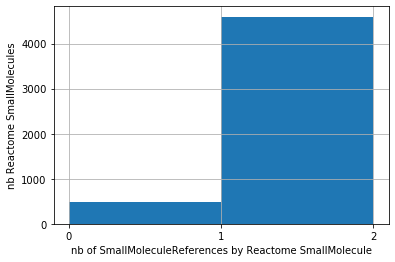

In [14]:
nbMappingsMax = df['nbRefs'].max()
ax = df['nbRefs'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of SmallMoleculeReferences by Reactome SmallMolecule")
ax.set_ylabel("nb Reactome SmallMolecules")

In [15]:
query="""
# distribution of the number of bp3:SmallMolecule associated to a bp3:SmallMoleculeReference

SELECT ?moleculeRef ((COUNT(DISTINCT ?molecule)) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
}
GROUP BY ?moleculeRef
ORDER BY DESC(?nbMolecules)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbMolecules'] = pandas.to_numeric(df['nbMolecules'])
df

moleculeRef  nbMolecules
0     http://www.reactome.org/biopax/83/48887#SmallM...           28
1     http://www.reactome.org/biopax/83/48887#SmallM...           21
2     http://www.reactome.org/biopax/83/48887#SmallM...           20
3     http://www.reactome.org/biopax/83/48887#SmallM...           20
4     http://www.reactome.org/biopax/83/48887#SmallM...           18
...                                                 ...          ...
2898  http://www.reactome.org/biopax/83/48887#SmallM...            1
2899  http://www.reactome.org/biopax/83/48887#SmallM...            1
2900  http://www.reactome.org/biopax/83/48887#SmallM...            1
2901  http://www.reactome.org/biopax/83/48887#SmallM...            1
2902  http://www.reactome.org/biopax/83/48887#SmallM...            1

[2903 rows x 2 columns]

nbMappingsMax: 28


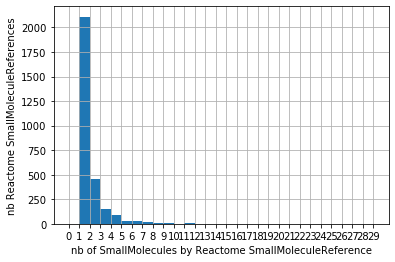

In [16]:
nbMappingsMax = df['nbMolecules'].max()
ax = df['nbMolecules'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of SmallMolecules by Reactome SmallMoleculeReference")
ax.set_ylabel("nb Reactome SmallMoleculeReferences")
print("nbMappingsMax: {}".format(nbMappingsMax))

# ChEBI hierarchy

## ChEBI molecules and bp3:SmallMolecules

In [17]:
query="""
# All small molecules

# chebidb:24431 = chemical entity
# ChEBI v207: 156723
# ChEBI v219: 162164
# ChEBI v221: 

# chebidb:23367 = molecular entity
# ChEBI v207: ?
# ChEBI v219: 157978
# ChEBI v221: 

SELECT (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type owl:Class .
  #?molecule rdfs:subClassOf* chebidb:24431.
  ?molecule rdfs:subClassOf* chebidb:23367.
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0      157978

In [18]:
query="""
# Number of ChEBI identifiers
SELECT (COUNT(DISTINCT ?chebiID) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0        1946

In [19]:
query="""
# Check whether all the ChEBI classes associated to 
# Reactome bp3:SmallMolecule are descendants
# of ChEBI's:
# - chemical entity (chebidb:24431): 1939 among 1946
# - molecular entity (chebidb:23367): 1861 among 1946

SELECT (COUNT(DISTINCT ?chebiMolecule) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID .
  
  BIND(IRI(REPLACE(?chebiID, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule)
  
  ?chebiMolecule rdfs:subClassOf* chebidb:23367 .
  #?chebiMolecule rdfs:subClassOf* chebidb:24431 .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0        1861

In [20]:
query="""
# ChEBI identifiers of bp3:SmallMolecule that are not 
# chemical entities (chebidb:24431)
# or
# molecular entities (chebidb:23367)

SELECT DISTINCT ?chebiID ?chebiMoleculeLabel
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID .
  
  BIND(IRI(REPLACE(?chebiID, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule)
  
  OPTIONAL {?chebiMolecule rdfs:label ?chebiMoleculeLabel}
  
  FILTER NOT EXISTS {
    #?chebiMolecule rdfs:subClassOf* chebidb:23367 .
    ?chebiMolecule rdfs:subClassOf* chebidb:24431 .
  }
}
ORDER BY ?chebiID
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

chebiID                    chebiMoleculeLabel
0  CHEBI:10545                              electron
1  CHEBI:13193                     hydrogen acceptor
2  CHEBI:17499                        hydrogen donor
3  CHEBI:17654                     electron acceptor
4  CHEBI:30212                                photon
5  CHEBI:35475  non-steroidal anti-inflammatory drug
6  CHEBI:50114                              estrogen

## Subsumption relations between bp3:SmallMoleculeReference

In [17]:
query="""
# Pairs of subclass--superclass among the 1939 ChEBI identifiers from Reactome

#SELECT DISTINCT ?chebiMolecule1 ?chebiMolecule2
SELECT DISTINCT ?chebiID1 ?molecule1Name  ?chebiID2 ?molecule2Name
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

chebiID1                molecule1Name     chebiID2  \
0     CHEBI:57330  trans-dodec-2-enoyl-CoA(4-)  CHEBI:77636   
1     CHEBI:57330  trans-dodec-2-enoyl-CoA(4-)  CHEBI:25696   
2     CHEBI:60192          triacyl lipopeptide  CHEBI:16670   
3     CHEBI:60192          triacyl lipopeptide  CHEBI:18059   
4     CHEBI:15940               nicotinic acid  CHEBI:33575   
...           ...                          ...          ...   
2955  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:15489   
2956  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:17984   
2957  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:37240   
2958  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:33447   
2959  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:18059   

                     molecule2Name  
0               fatty acyl-CoA(4-)  
1                    organic anion  
2                          peptide  
3                            lipid  
4                  carboxylic acid  
...                            ...  
2955          3-oxo-fatty acyl-CoA  
2956                      acyl-CoA  
2957  adenosine 3',5'-bisphosphate  
2958                 phospho sugar  
2959                         lipid  

[2960 rows x 4 columns]

In [18]:
query="""
# Nb of subclasses in the pairs of subclass--superclass among the 1939 ChEBI identifiers from Reactome

SELECT (COUNT(DISTINCT ?chebiID1) AS ?nbSubclasses)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbSubclasses
0         1286

In [19]:
query="""
# Nb of superclasses in the pairs of subclass--superclass among the 1939 ChEBI identifiers from Reactome

SELECT (COUNT(DISTINCT ?chebiID2) AS ?nbSuperclasses)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbSuperclasses
0            112

In [20]:
query="""
# Nb of root superclasses in the pairs of subclass--superclass among the 1939 ChEBI identifiers from Reactome

SELECT (COUNT(DISTINCT ?chebiID2) AS ?nbRootSuperclasses)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
  
  FILTER NOT EXISTS {
    ?chebiMolecule2 rdfs:subClassOf+ ?chebiMolecule3 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbRootSuperclasses
0                 42

In [21]:
query="""
# Root superclasses in the pairs of subclass--superclass among the 1939 ChEBI identifiers from Reactome

SELECT DISTINCT ?chebiID2 ?molecule2Name
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
  
  FILTER NOT EXISTS {
    ?chebiMolecule2 rdfs:subClassOf+ ?chebiMolecule3 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
}
ORDER BY ?chebiID2
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

chebiID2                        molecule2Name
0   CHEBI:15266                     triphosphate ion
1   CHEBI:15986                       polynucleotide
2   CHEBI:16516  2'-deoxyribonucleoside triphosphate
3   CHEBI:16670                              peptide
4   CHEBI:16862            nucleoside 5'-diphosphate
5   CHEBI:17634                            D-glucose
6   CHEBI:17654                    electron acceptor
7   CHEBI:17972          ribonucleoside triphosphate
8   CHEBI:17976                            ubiquinol
9   CHEBI:18059                                lipid
10  CHEBI:18085                    glycosaminoglycan
11  CHEBI:18274               2'-deoxyribonucleoside
12  CHEBI:21507      N-acetyl-D-galactosaminyl group
13   CHEBI:2181                       L-fucopyranose
14  CHEBI:22221                           acyl group
15  CHEBI:25372               molybdopterin cofactor
16  CHEBI:25609                     nucleotide-sugar
17  CHEBI:25696                        organic anion
18  CHEBI:26355                               heme b
19  CHEBI:26523              reactive oxygen species
20  CHEBI:26558         ribonucleoside monophosphate
21  CHEBI:26667                          sialic acid
22  CHEBI:28037             N-acetyl-D-galactosamine
23  CHEBI:30563                      silicon dioxide
24  CHEBI:30879                              alcohol
25  CHEBI:33447                        phospho sugar
26  CHEBI:33575                      carboxylic acid
27  CHEBI:33913                            corrinoid
28  CHEBI:35746                       fatty aldehyde
29  CHEBI:36080                              protein
30  CHEBI:36141                              quinone
31  CHEBI:36916                               cation
32  CHEBI:38573                            ferroheme
33  CHEBI:38574                            ferriheme
34  CHEBI:46640                             diketone
35  CHEBI:46899                        benzothiazine
36  CHEBI:47037           cyclic purine dinucleotide
37  CHEBI:49883          tetra-mu3-sulfido-tetrairon
38  CHEBI:52575                        alkylglycerol
39  CHEBI:59869        L-alpha-amino acid zwitterion
40  CHEBI:61248             alpha-D-galactosyl group
41  CHEBI:90799                 dipeptide zwitterion

In [22]:
query="""
# Nb of Leaves subclasses in the pairs of subclass--superclass among the 1939 ChEBI identifiers from Reactome

SELECT (COUNT(DISTINCT ?chebiID1) AS ?nbLeafSubclasses)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?moleculeName . }
  
  FILTER NOT EXISTS {
    ?chebiMolecule3 rdfs:subClassOf+ ?chebiMolecule1 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbLeafSubclasses
0             1216

In [23]:
query="""
# Nb of intermediate subclasses in the pairs of subclass--superclass among the 1939 ChEBI identifiers from Reactome

SELECT (COUNT(DISTINCT ?chebiID1) AS ?nbIntermediateClasses)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?moleculeName . }
  
  #FILTER NOT EXISTS {
    ?chebiMolecule3 rdfs:subClassOf+ ?chebiMolecule1 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  #}
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbIntermediateClasses
0                    70

In [24]:
query="""
# Nb of isolated classes among the 1939 ChEBI identifiers from Reactome

SELECT (COUNT(DISTINCT ?chebiID1) AS ?nbIsolatedClasses)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?moleculeName . }
  
  FILTER NOT EXISTS {
    ?chebiMolecule2 rdfs:subClassOf+ ?chebiMolecule1 .
    BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
    ?moleculeXref2 bp3:id ?chebiID2 .
    ?moleculeXref2 bp3:db "ChEBI" .
    ?moleculeRef2 bp3:xref ?moleculeXref2 .
    ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
  
  FILTER NOT EXISTS {
    ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule3 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbIsolatedClasses
0               618

In [25]:
query="""
# Direct subsumption between the 1328 of the1939 ChEBI identifiers from Reactome

SELECT DISTINCT ?chebiID1 ?molecule1Name ?chebiID2 ?molecule2Name
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule3 .
    ?chebiMolecule3 rdfs:subClassOf+ ?chebiMolecule2 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

chebiID1                                      molecule1Name  \
0      CHEBI:65136  (4Z,7Z,10Z,13Z,16Z)-docosa-4,7,10,13,16-pentae...   
1      CHEBI:17823                                         calcitriol   
2      CHEBI:58937                       thiamine(1+) diphosphate(3-)   
3      CHEBI:58937                       thiamine(1+) diphosphate(3-)   
4      CHEBI:90815  (4Z,7Z,10Z,14E,16Z,19Z)-13-hydroxydocosahexaen...   
...            ...                                                ...   
1648   CHEBI:16891                                     glyoxylic acid   
1649   CHEBI:27668                           (S)-3-hydroxylauroyl-CoA   
1650   CHEBI:15710                                   betaine aldehyde   
1651   CHEBI:31998                             N-acylphytosphingosine   
1652  CHEBI:192798                                 sulfociprofloxacin   

         chebiID2                molecule2Name  
0     CHEBI:15904        long-chain fatty acid  
1     CHEBI:18059                        lipid  
2     CHEBI:25696                organic anion  
3     CHEBI:26948                   vitamin B1  
4     CHEBI:57560  long-chain fatty acid anion  
...           ...                          ...  
1648  CHEBI:33575              carboxylic acid  
1649  CHEBI:61907  medium-chain fatty acyl-CoA  
1650  CHEBI:36916                       cation  
1651  CHEBI:17761                     ceramide  
1652  CHEBI:33575              carboxylic acid  

[1653 rows x 4 columns]

In [26]:
G = nx.DiGraph()

query="""
# Direct subsumption between the 1328 of the1939 ChEBI identifiers from Reactome

SELECT DISTINCT ?chebiID1 ?molecule1Name ?chebiID2 ?molecule2Name
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule3 .
    ?chebiMolecule3 rdfs:subClassOf+ ?chebiMolecule2 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}"""

sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    #print(result["rel"]["value"])
    ident1 = result["chebiID1"]["value"].replace("CHEBI:", "chebi")
    name1 = result["molecule1Name"]["value"]
    ident2 = result["chebiID2"]["value"].replace("CHEBI:", "chebi")
    name2 = result["molecule2Name"]["value"]
    for (currentIdent, currentName) in [(ident1, name1), (ident2, name2)]:
        if not G.has_node(currentIdent):
            G.add_node(currentIdent, label=currentName, isolated=0)
    G.add_edge(ident1, ident2)

nx.write_gexf(G, "images/moleculesTaxonomy-without_root.gexf")


query="""
# Isolated classes among the 1939 ChEBI identifiers from Reactome

SELECT DISTINCT ?chebiID1 ?molecule1Name
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  
  FILTER NOT EXISTS {
    ?chebiMolecule2 rdfs:subClassOf+ ?chebiMolecule1 .
    BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
    ?moleculeXref2 bp3:id ?chebiID2 .
    ?moleculeXref2 bp3:db "ChEBI" .
    ?moleculeRef2 bp3:xref ?moleculeXref2 .
    ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
  
  FILTER NOT EXISTS {
    ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule3 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
}"""
G.add_node("chebi24431", label="chemical entity", isolated=1)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    #print(result["rel"]["value"])
    ident1 = result["chebiID1"]["value"].replace("CHEBI:", "chebi")
    name1 = result["molecule1Name"]["value"]
    G.add_node(ident1, label=name1, isolated=1)
    G.add_edge(ident1, "chebi24431")

query="""
# Root classes 

SELECT DISTINCT ?chebiID2
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
  
  FILTER NOT EXISTS {
    ?chebiMolecule2 rdfs:subClassOf+ ?chebiMolecule3 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
}"""
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    ident1 = result["chebiID2"]["value"].replace("CHEBI:", "chebi")
    G.add_edge(ident1, "chebi24431")

nx.write_gexf(G, "images/moleculesTaxonomy-with_root.gexf")

In [7]:
query="""
# Distribution of the number of superclasses among the 1939 ChEBI identifiers from Reactome (actually, among those that do have at least 1 superclass)

SELECT DISTINCT ?chebiID1 ?molecule1Name (COUNT(DISTINCT ?chebiID2) AS ?nbSuperclasses)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  #OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}
GROUP BY ?chebiID1 ?molecule1Name
ORDER BY DESC(?nbSuperclasses)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbSuperclasses'] = pandas.to_numeric(df['nbSuperclasses'])
df

chebiID1                                      molecule1Name  \
0     CHEBI:138206  (13R)-S-cysteinylglycinyl-(14S)-hydroxy-(4Z,7Z...   
1     CHEBI:138640                                        17(S)-HDoHE   
2     CHEBI:140263  16(S)-glycinylcystein-S-yl-17(R)-hydroxy-(4Z,7...   
3     CHEBI:140269  (8S)-glycinylcystein-S-yl-(7R,17S)-dihydroxy-(...   
4      CHEBI:17504           1-O-acyl-sn-glycero-3-phosphocholine(1+)   
...            ...                                                ...   
1281   CHEBI:90832                                           NMNH(2-)   
1282   CHEBI:91124                     alpha-D-Xyl-(1->3)-beta-D-GlcA   
1283   CHEBI:91125  beta-D-GlcA-(1->3)-alpha-D-Xyl-(1->3)-beta-D-GlcA   
1284    CHEBI:9407                             taurochenodeoxycholate   
1285    CHEBI:9463                             testosterone cypionate   

      nbSuperclasses  
0                  8  
1                  8  
2                  8  
3                  8  
4                  8  
...              ...  
1281               1  
1282               1  
1283               1  
1284               1  
1285               1  

[1286 rows x 3 columns]

nbMappingsMax: 8


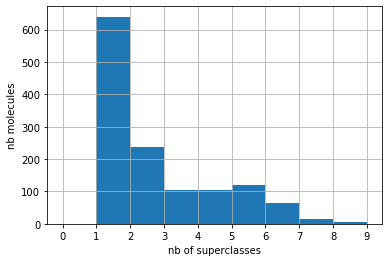

In [18]:
nbMappingsMax = df['nbSuperclasses'].max()
ax = df['nbSuperclasses'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of superclasses")
ax.set_ylabel("nb molecules")
print("nbMappingsMax: {}".format(nbMappingsMax))

In [8]:
query="""
# Distribution of the number of subclasses among the 1939 ChEBI identifiers from Reactome  (actually, among those that do have at least 1 subclass)

SELECT DISTINCT ?chebiID1 ?molecule1Name (COUNT(DISTINCT ?chebiID2) AS ?nbSubclasses)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule2 rdfs:subClassOf+ ?chebiMolecule1 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  #OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}
GROUP BY ?chebiID1 ?molecule1Name
ORDER BY DESC(?nbSubclasses)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbSubclasses'] = pandas.to_numeric(df['nbSubclasses'])
df

chebiID1                         molecule1Name  nbSubclasses
0    CHEBI:18059                                 lipid           627
1    CHEBI:25696                         organic anion           336
2    CHEBI:33575                       carboxylic acid           312
3    CHEBI:35366                            fatty acid           190
4    CHEBI:30879                               alcohol           183
..           ...                                   ...           ...
107  CHEBI:52572  acylglucosaminylphosphatidylinositol             1
108  CHEBI:61360                             globoside             1
109  CHEBI:85944             2-methylpentadecenoyl-CoA             1
110  CHEBI:90779         S-substituted glutathione(1-)             1
111  CHEBI:90799                  dipeptide zwitterion             1

[112 rows x 3 columns]

nbMappingsMax: 627


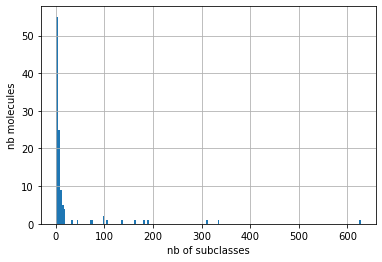

In [20]:
nbMappingsMax = df['nbSubclasses'].max()
#ax = df['nbSubclasses'].hist(bins=range(nbMappingsMax+2))
ax = df['nbSubclasses'].hist(bins='auto')
#ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of subclasses")
ax.set_ylabel("nb molecules")
print("nbMappingsMax: {}".format(nbMappingsMax))

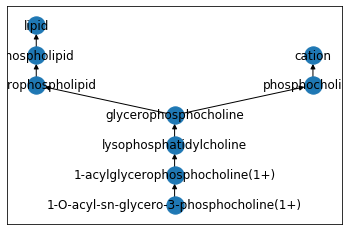

In [46]:
#leafIdent = "138206"
#leafIdent = "138640"
leafIdent = "17504"


query="""
# Hierarchy of superclasses of a molecule

SELECT DISTINCT ?chebiID1 ?molecule1Name ?chebiID2 ?molecule2Name
WHERE {

  VALUES ?chebiLeafID { 'CHEBI:""" + leafIdent + """' }
  
  BIND(IRI(REPLACE(?chebiLeafID, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMoleculeLeaf)
  
  ?chebiMoleculeLeaf rdfs:subClassOf* ?chebiMolecule1 .
  BIND(REPLACE(STR(?chebiMolecule1), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID1)
  ?moleculeXref1 bp3:id ?chebiID1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule3 .
    ?chebiMolecule3 rdfs:subClassOf+ ?chebiMolecule2 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}"""

G = nx.DiGraph()

sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    ident1 = result["chebiID1"]["value"].replace("CHEBI:", "chebi")
    name1 = result["molecule1Name"]["value"]
    ident2 = result["chebiID2"]["value"].replace("CHEBI:", "chebi")
    name2 = result["molecule2Name"]["value"]
    for (currentIdent, currentName) in [(ident1, name1), (ident2, name2)]:
        if not G.has_node(currentIdent):
            G.add_node(currentIdent, label=currentName, isolated=0)
    G.add_edge(ident1, ident2)

nx.write_gexf(G, "images/moleculesTaxonomy_chebi{}.gexf".format(leafIdent))

attrs_g = {'rankdir': 'BT'}
G.graph.update(attrs_g)
labels = nx.get_node_attributes(G,'label')
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw_networkx(G, pos, labels = labels, with_labels = True)
plt.savefig("images/moleculesTaxonomy_chebi{}_preview.png".format(leafIdent), dpi=300, bbox_inches='tight')
plt.show()

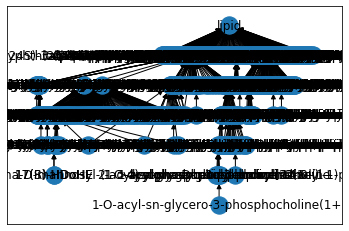

In [12]:
rootIdent = "18059"


query="""
# Hierarchy of subclasses of a molecule

SELECT DISTINCT ?chebiID1 ?molecule1Name ?chebiID2 ?molecule2Name
WHERE {

  VALUES ?chebiRootID { 'CHEBI:""" + rootIdent + """' }
  
  BIND(IRI(REPLACE(?chebiRootID, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMoleculeRoot)
  
  ?chebiMolecule1 rdfs:subClassOf* ?chebiMoleculeRoot .
  BIND(REPLACE(STR(?chebiMolecule1), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID1)
  ?moleculeXref1 bp3:id ?chebiID1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  ?chebiMolecule2 rdfs:subClassOf+ ?chebiMolecule1 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?chebiMolecule2 rdfs:subClassOf+ ?chebiMolecule3 .
    ?chebiMolecule3 rdfs:subClassOf+ ?chebiMolecule1 .
    BIND(REPLACE(STR(?chebiMolecule3), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID3)
    ?moleculeXref3 bp3:id ?chebiID3 .
    ?moleculeXref3 bp3:db "ChEBI" .
    ?moleculeRef3 bp3:xref ?moleculeXref3 .
    ?moleculeRef3 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}"""

G = nx.DiGraph()

sparql = SPARQLWrapper(endpointURL)
sparql.setQuery(prefixes+query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    ident1 = result["chebiID1"]["value"].replace("CHEBI:", "chebi")
    name1 = result["molecule1Name"]["value"]
    ident2 = result["chebiID2"]["value"].replace("CHEBI:", "chebi")
    name2 = result["molecule2Name"]["value"]
    for (currentIdent, currentName) in [(ident1, name1), (ident2, name2)]:
        if not G.has_node(currentIdent):
            G.add_node(currentIdent, label=currentName, isolated=0)
    G.add_edge(ident2, ident1)

nx.write_gexf(G, "images/moleculesTaxonomy_chebi{}.gexf".format(rootIdent))

attrs_g = {'rankdir': 'BT'}
G.graph.update(attrs_g)
labels = nx.get_node_attributes(G,'label')
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw_networkx(G, pos, labels = labels, with_labels = True)
plt.savefig("images/moleculesTaxonomy_chebi{}_preview.png".format(rootIdent), dpi=300, bbox_inches='tight')
plt.show()

## Distribution of the number of bp3:SmallMolecule associated to a bp3:SmallMoleculeReference of interest

### bp3:SmallMolecule explicitely associated to a bp3:SmallMoleculeReference

In [14]:
query="""
# Distribution of the number of bp3:SmallMolecules explicitely associated to a bp3:SmallMoleculeReference

SELECT ?moleculeRef1 (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?molecule bp3:entityReference ?moleculeRef1 .
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
}
GROUP BY ?moleculeRef1
ORDER BY DESC(?nbMolecules)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbMolecules'] = pandas.to_numeric(df['nbMolecules'])
df

moleculeRef1  nbMolecules
0     http://www.reactome.org/biopax/83/48887#SmallM...           28
1     http://www.reactome.org/biopax/83/48887#SmallM...           21
2     http://www.reactome.org/biopax/83/48887#SmallM...           20
3     http://www.reactome.org/biopax/83/48887#SmallM...           20
4     http://www.reactome.org/biopax/83/48887#SmallM...           18
...                                                 ...          ...
2898  http://www.reactome.org/biopax/83/48887#SmallM...            1
2899  http://www.reactome.org/biopax/83/48887#SmallM...            1
2900  http://www.reactome.org/biopax/83/48887#SmallM...            1
2901  http://www.reactome.org/biopax/83/48887#SmallM...            1
2902  http://www.reactome.org/biopax/83/48887#SmallM...            1

[2903 rows x 2 columns]

nbMappingsMax: 28


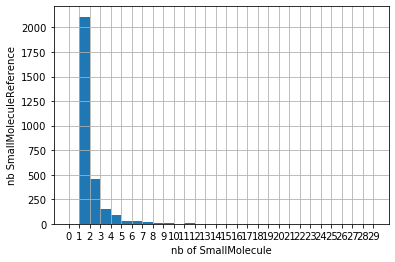

In [15]:
nbMappingsMax = df['nbMolecules'].max()
ax = df['nbMolecules'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of SmallMolecule")
ax.set_ylabel("nb SmallMoleculeReference")
print("nbMappingsMax: {}".format(nbMappingsMax))

### bp3:SmallMolecule implicitely associated to a bp3:SmallMoleculeReference

In [14]:
query="""
# Distribution of the number of bp3:SmallMolecules exlicitely associated to a bp3:SmallMoleculeReference having a mapping to ChEBI

SELECT ?moleculeRef1 (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  ?molecule bp3:entityReference ?moleculeRef1 .
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
}
GROUP BY ?moleculeRef1
ORDER BY DESC(?nbMolecules)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbMolecules'] = pandas.to_numeric(df['nbMolecules'])
df

moleculeRef1  nbMolecules
0     http://www.reactome.org/biopax/83/48887#SmallM...           28
1     http://www.reactome.org/biopax/83/48887#SmallM...           21
2     http://www.reactome.org/biopax/83/48887#SmallM...           20
3     http://www.reactome.org/biopax/83/48887#SmallM...           20
4     http://www.reactome.org/biopax/83/48887#SmallM...           18
...                                                 ...          ...
1941  http://www.reactome.org/biopax/83/48887#SmallM...            1
1942  http://www.reactome.org/biopax/83/48887#SmallM...            1
1943  http://www.reactome.org/biopax/83/48887#SmallM...            1
1944  http://www.reactome.org/biopax/83/48887#SmallM...            1
1945  http://www.reactome.org/biopax/83/48887#SmallM...            1

[1946 rows x 2 columns]

nbMappingsMax: 28


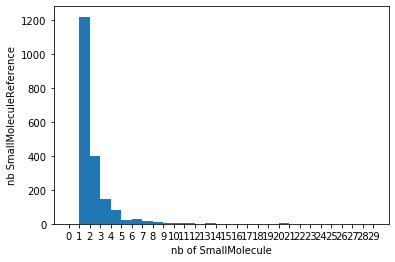

In [15]:
nbMappingsMax = df['nbMolecules'].max()
ax = df['nbMolecules'].hist(bins=range(nbMappingsMax+2), grid=False)
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of SmallMolecule")
ax.set_ylabel("nb SmallMoleculeReference")
print("nbMappingsMax: {}".format(nbMappingsMax))

In [11]:
query="""
# Distribution of the number of bp3:SmallMolecules implicitely associated to a bp3:SmallMoleculeReference (via subClass)

SELECT ?moleculeRef1 (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule2 rdfs:subClassOf* ?chebiMolecule1 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  ?molecule bp3:entityReference ?moleculeRef2 .
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
}
GROUP BY ?moleculeRef1
ORDER BY DESC(?nbMolecules)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbMolecules'] = pandas.to_numeric(df['nbMolecules'])
df

moleculeRef1  nbMolecules
0     http://www.reactome.org/biopax/83/48887#SmallM...         1085
1     http://www.reactome.org/biopax/83/48887#SmallM...          730
2     http://www.reactome.org/biopax/83/48887#SmallM...          509
3     http://www.reactome.org/biopax/83/48887#SmallM...          318
4     http://www.reactome.org/biopax/83/48887#SmallM...          310
...                                                 ...          ...
1941  http://www.reactome.org/biopax/83/48887#SmallM...            1
1942  http://www.reactome.org/biopax/83/48887#SmallM...            1
1943  http://www.reactome.org/biopax/83/48887#SmallM...            1
1944  http://www.reactome.org/biopax/83/48887#SmallM...            1
1945  http://www.reactome.org/biopax/83/48887#SmallM...            1

[1946 rows x 2 columns]

nbMappingsMax: 1085


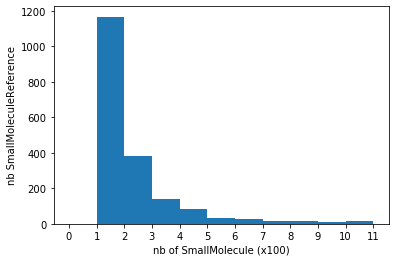

In [12]:
nbMappingsMax = df['nbMolecules'].max()
ax = df['nbMolecules'].hist(bins=range((nbMappingsMax//100)+2), grid=False)
ax.set_xticks(range((nbMappingsMax//100)+2))
#ax.set_xticks([100*x for x in range((nbMappingsMax//100)+2)])
ax.set_xlabel("nb of SmallMolecule (x100)")
ax.set_ylabel("nb SmallMoleculeReference")
print("nbMappingsMax: {}".format(nbMappingsMax))

In [16]:
query="""
# Distribution of the number of bp3:SmallMolecules implicitely associated to a bp3:SmallMoleculeReference (via superClass)

SELECT ?moleculeRef1 (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf* ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  ?molecule bp3:entityReference ?moleculeRef2 .
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
}
GROUP BY ?moleculeRef1
ORDER BY DESC(?nbMolecules)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbMolecules'] = pandas.to_numeric(df['nbMolecules'])
df

moleculeRef1  nbMolecules
0     http://www.reactome.org/biopax/83/48887#SmallM...           39
1     http://www.reactome.org/biopax/83/48887#SmallM...           39
2     http://www.reactome.org/biopax/83/48887#SmallM...           39
3     http://www.reactome.org/biopax/83/48887#SmallM...           35
4     http://www.reactome.org/biopax/83/48887#SmallM...           34
...                                                 ...          ...
1941  http://www.reactome.org/biopax/83/48887#SmallM...            1
1942  http://www.reactome.org/biopax/83/48887#SmallM...            1
1943  http://www.reactome.org/biopax/83/48887#SmallM...            1
1944  http://www.reactome.org/biopax/83/48887#SmallM...            1
1945  http://www.reactome.org/biopax/83/48887#SmallM...            1

[1946 rows x 2 columns]

nbMappingsMax: 39


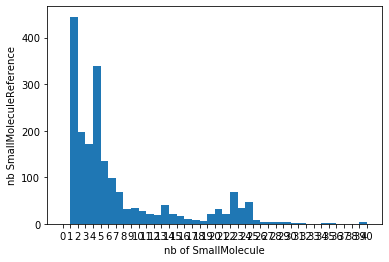

In [17]:
nbMappingsMax = df['nbMolecules'].max()
ax = df['nbMolecules'].hist(bins=range(nbMappingsMax+2), grid=False)
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of SmallMolecule")
ax.set_ylabel("nb SmallMoleculeReference")
print("nbMappingsMax: {}".format(nbMappingsMax))

# Instances of `bp3:SmallMoleculeReference` that do not have a mapping to ChEBI

In [6]:
query="""
# Number of instances of bp3:SmallMoleculeReference

SELECT (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeReferences)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculeReferences
0                 2903

In [7]:
query="""
# Number of instances of bp3:SmallMoleculeReference having a mapping to ChEBI

SELECT (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeReferences)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculeReferences
0                 1946

In [8]:
query="""
# Number of instances of bp3:SmallMoleculeReference without mapping to ChEBI

SELECT (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeReferences)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    #?moleculeXref bp3:id ?chebiID .
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculeReferences
0                  957

In [9]:
query="""
# Instances of bp3:SmallMoleculeReference without mapping to ChEBI

SELECT DISTINCT ?moleculeRef ?moleculeRefName
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    #?moleculeXref bp3:id ?chebiID .
  }
  
  OPTIONAL { ?moleculeRef bp3:name ?moleculeRefName . }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

moleculeRef  \
0     http://www.reactome.org/biopax/84/48887#SmallM...   
1     http://www.reactome.org/biopax/84/48887#SmallM...   
2     http://www.reactome.org/biopax/84/48887#SmallM...   
3     http://www.reactome.org/biopax/84/48887#SmallM...   
4     http://www.reactome.org/biopax/84/48887#SmallM...   
...                                                 ...   
4178  http://www.reactome.org/biopax/84/48887#SmallM...   
4179  http://www.reactome.org/biopax/84/48887#SmallM...   
4180  http://www.reactome.org/biopax/84/48887#SmallM...   
4181  http://www.reactome.org/biopax/84/48887#SmallM...   
4182  http://www.reactome.org/biopax/84/48887#SmallM...   

                                    moleculeRefName  
0                                           ABT 263  
1           navitoclax [Guide to Pharmacology:8319]  
2                                        navitoclax  
3                                           ABT-263  
4                           calcitriol hexafluoride  
...                                             ...  
4178                                      capsaicin  
4179         capsaicin [Guide to Pharmacology:2486]  
4180                               1-azakenpaullone  
4181  1-azakenpaullone [Guide to Pharmacology:8018]  
4182                                 azakenpaullone  

[4183 rows x 2 columns]

In [10]:
query="""
# Instances of bp3:SmallMoleculeReference without mapping to ChEBI and without a name

SELECT DISTINCT ?moleculeRef 
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    #?moleculeXref bp3:id ?chebiID .
  }
  
  FILTER NOT EXISTS { ?moleculeRef bp3:name ?moleculeRefName . }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

Empty DataFrame
Columns: [moleculeRef]
Index: []

> **Interpretation:** all the instances of `bp3:SmallMoleculeReference` that do not have a mapping to ChEBI have >= 1 `bp3:name`

In [11]:
query="""
# Distribution of the number of names for the instances of bp3:SmallMoleculeReference without mapping to ChEBI

SELECT DISTINCT ?moleculeRef (COUNT(DISTINCT ?moleculeRefName) AS ?nbNames)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    #?moleculeXref bp3:id ?chebiID .
  }
  
  ?moleculeRef bp3:name ?moleculeRefName . 
}
GROUP BY ?moleculeRef 
ORDER BY DESC(?nbNames)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbNames'] = pandas.to_numeric(df['nbNames'])
df

moleculeRef  nbNames
0    http://www.reactome.org/biopax/84/48887#SmallM...        9
1    http://www.reactome.org/biopax/84/48887#SmallM...        9
2    http://www.reactome.org/biopax/84/48887#SmallM...        9
3    http://www.reactome.org/biopax/84/48887#SmallM...        9
4    http://www.reactome.org/biopax/84/48887#SmallM...        9
..                                                 ...      ...
952  http://www.reactome.org/biopax/84/48887#SmallM...        2
953  http://www.reactome.org/biopax/84/48887#SmallM...        2
954  http://www.reactome.org/biopax/84/48887#SmallM...        2
955  http://www.reactome.org/biopax/84/48887#SmallM...        2
956  http://www.reactome.org/biopax/84/48887#SmallM...        1

[957 rows x 2 columns]

nbMappingsMax: 9


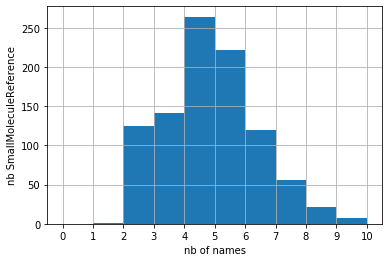

In [12]:
nbMappingsMax = df['nbNames'].max()
ax = df['nbNames'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of names")
ax.set_ylabel("nb SmallMoleculeReference")
print("nbMappingsMax: {}".format(nbMappingsMax))

> **Interpretation:** each of the 957 instances of `bp3:SmallMoleculeReference` that does not have a mapping to ChEBI has from 1 to 9 names.

In [18]:
query="""
# ChEBI identifiers associated to at least an instance of bp3:SmallMoleculeReference without mapping to ChEBI, but having a name that matches a ChEBI molecule

#SELECT (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeRefs)
SELECT (COUNT(DISTINCT ?chebiIdent) AS ?nbChEBIidents)

WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    #?moleculeXref bp3:id ?chebiID .
  }
  
  ?moleculeRef bp3:name ?moleculeRefName . 
  
  #?chebiIdent rdfs:label|oboInOwl:hasExactSynonym|oboInOwl:hasRelatedSynonym ?moleculeRefName .
  ?chebiIdent rdfs:label|oboInOwl:hasExactSynonym ?moleculeRefName .
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbChEBIidents
0           718

> **Interpretation:** there are ~~838~~ 718 ChEBI molecules that have a name that matches exactly (838 partially) (one of) the name of an instance of `bp3:SmallMoleculeReference` that do not have a mapping to ChEBI.

In [19]:
query="""
# ChEBI identifiers associated to at least an instance of bp3:SmallMoleculeReference without mapping to ChEBI, but having a name that matches a ChEBI molecule

SELECT (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeRefs)
#SELECT (COUNT(DISTINCT ?chebiIdent) AS ?nbChEBIidents)

WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    #?moleculeXref bp3:id ?chebiID .
  }
  
  ?moleculeRef bp3:name ?moleculeRefName . 
  
  #?chebiIdent rdfs:label|oboInOwl:hasExactSynonym|oboInOwl:hasRelatedSynonym ?moleculeRefName .
  ?chebiIdent rdfs:label|oboInOwl:hasExactSynonym ?moleculeRefName .
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculeRefs
0            692

> **Interpretation:** ~~733~~ 692 of the 957 instances of `bp3:SmallMoleculeReference` that do not have a mapping to ChEBI have a name that matches exactly (733 partially) the name of one of the 838 ChEBI molecules.

In [22]:
query="""
# Distribution of the number of ChEBI entities for the instances of bp3:SmallMoleculeReference without mapping to ChEBI, but having a name that matches a ChEBI molecule

SELECT DISTINCT ?moleculeRef (COUNT(DISTINCT ?chebiIdent) AS ?nbChEBIidents)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    #?moleculeXref bp3:id ?chebiID .
  }
  
  ?moleculeRef bp3:name ?moleculeRefName . 
  
  #?chebiIdent rdfs:label|oboInOwl:hasExactSynonym|oboInOwl:hasRelatedSynonym ?moleculeRefName .
  ?chebiIdent rdfs:label|oboInOwl:hasExactSynonym ?moleculeRefName .
}
GROUP BY ?moleculeRef
ORDER BY DESC(?nbChEBIidents)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbChEBIidents'] = pandas.to_numeric(df['nbChEBIidents'])
df

moleculeRef  nbChEBIidents
0    http://www.reactome.org/biopax/84/48887#SmallM...              3
1    http://www.reactome.org/biopax/84/48887#SmallM...              2
2    http://www.reactome.org/biopax/84/48887#SmallM...              2
3    http://www.reactome.org/biopax/84/48887#SmallM...              2
4    http://www.reactome.org/biopax/84/48887#SmallM...              2
..                                                 ...            ...
687  http://www.reactome.org/biopax/84/48887#SmallM...              1
688  http://www.reactome.org/biopax/84/48887#SmallM...              1
689  http://www.reactome.org/biopax/84/48887#SmallM...              1
690  http://www.reactome.org/biopax/84/48887#SmallM...              1
691  http://www.reactome.org/biopax/84/48887#SmallM...              1

[692 rows x 2 columns]

nbMappingsMax: 3


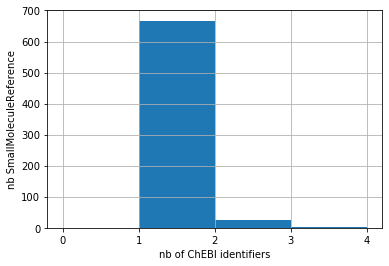

In [23]:
nbMappingsMax = df['nbChEBIidents'].max()
ax = df['nbChEBIidents'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of ChEBI identifiers")
ax.set_ylabel("nb SmallMoleculeReference")
print("nbMappingsMax: {}".format(nbMappingsMax))

In [16]:
query="""
# Distribution of the number of bp3:SmallMoleculeReference without mapping to ChEBI, but having a name that matches a ChEBI molecule

SELECT DISTINCT ?chebiIdent (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeRefs)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    #?moleculeXref bp3:id ?chebiID .
  }
  
  ?moleculeRef bp3:name ?moleculeRefName . 
  
  #?chebiIdent rdfs:label|oboInOwl:hasExactSynonym|oboInOwl:hasRelatedSynonym ?moleculeRefName .
  ?chebiIdent rdfs:label|oboInOwl:hasExactSynonym ?moleculeRefName .
}
GROUP BY ?chebiIdent
ORDER BY DESC(?nbMoleculeRefs)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbMoleculeRefs'] = pandas.to_numeric(df['nbMoleculeRefs'])
df

chebiIdent  nbMoleculeRefs
0     http://purl.obolibrary.org/obo/CHEBI_10033               1
1     http://purl.obolibrary.org/obo/CHEBI_10093               1
2     http://purl.obolibrary.org/obo/CHEBI_10100               1
3    http://purl.obolibrary.org/obo/CHEBI_101085               1
4    http://purl.obolibrary.org/obo/CHEBI_101096               1
..                                           ...             ...
713    http://purl.obolibrary.org/obo/CHEBI_9738               1
714    http://purl.obolibrary.org/obo/CHEBI_9753               1
715    http://purl.obolibrary.org/obo/CHEBI_9927               1
716    http://purl.obolibrary.org/obo/CHEBI_9943               1
717    http://purl.obolibrary.org/obo/CHEBI_9948               1

[718 rows x 2 columns]

> **Interpretation:** Most of the instances of `bp3:SmallMoleculeReference` without an explicit mapping to ChEBI have a name that corresponds to an entity on ChEBI
>    - 692 of 957 with `rdfs:label` or `oboInOwl:hasExactSynonym`
>        - 667 of 957 are associated to exactly 1 ChEBI entity
>        - 24 of 957 are associated to exactly 2 ChEBI entities
>        - 1 of 957 are associated to exactly 3 ChEBI entities
>    - 733 of 957 with `rdfs:label` or `oboInOwl:hasExactSynonym` or `oboInOwl:hasRelatedSynonym`

In [24]:
query="""
# Distribution of the number of ChEBI entities for the instances of bp3:SmallMoleculeReference without mapping to ChEBI, but having a name that matches a ChEBI molecule

SELECT DISTINCT ?nbChEBIidents (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeRefs)
WHERE {
  SELECT DISTINCT ?moleculeRef (COUNT(DISTINCT ?chebiIdent) AS ?nbChEBIidents)
  WHERE {
    ?molecule rdf:type bp3:SmallMolecule .
    ?molecule bp3:entityReference ?moleculeRef .
    ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
    FILTER NOT EXISTS {
      ?moleculeRef bp3:xref ?moleculeXref .
      ?moleculeXref bp3:db "ChEBI" .
      #?moleculeXref bp3:id ?chebiID .
    }
  
    ?moleculeRef bp3:name ?moleculeRefName . 
  
    #?chebiIdent rdfs:label|oboInOwl:hasExactSynonym|oboInOwl:hasRelatedSynonym ?moleculeRefName .
    ?chebiIdent rdfs:label|oboInOwl:hasExactSynonym ?moleculeRefName .
  }
  GROUP BY ?moleculeRef
}
GROUP BY ?nbChEBIidents
ORDER BY ASC(?nbChEBIidents)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbChEBIidents'] = pandas.to_numeric(df['nbChEBIidents'])
df

nbChEBIidents nbMoleculeRefs
0              1            667
1              2             24
2              3              1

![mappings from SmallMoleculeReference to ChEBY by names](./images/mappings_SmallMoleculeReference_ChEBI_names.png)

In [4]:
query="""
# Instances of bp3:SmallMoleculeReference without mapping to ChEBI, but having a name that matches a ChEBI molecule

SELECT DISTINCT ?moleculeRef ?moleculeRefName ?chebiIdent
WHERE {
  {
  SELECT DISTINCT ?moleculeRef (COUNT(DISTINCT ?chebiIdent) AS ?nbChEBIidents)
  WHERE {
    ?molecule rdf:type bp3:SmallMolecule .
    ?molecule bp3:entityReference ?moleculeRef .
    ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
    FILTER NOT EXISTS {
      ?moleculeRef bp3:xref ?moleculeXref .
      ?moleculeXref bp3:db "ChEBI" .
      #?moleculeXref bp3:id ?chebiID .
    }
  
    ?moleculeRef bp3:name ?moleculeRefName . 
  
    #?chebiIdent rdfs:label|oboInOwl:hasExactSynonym|oboInOwl:hasRelatedSynonym ?moleculeRefName .
    ?chebiIdent rdfs:label|oboInOwl:hasExactSynonym ?moleculeRefName .
  }
  GROUP BY ?moleculeRef
  }
  
  FILTER (?nbChEBIidents > 1)
  ?moleculeRef bp3:name ?moleculeRefName .
  
  #?chebiIdent rdfs:label|oboInOwl:hasExactSynonym|oboInOwl:hasRelatedSynonym ?moleculeRefName .
  ?chebiIdent rdfs:label|oboInOwl:hasExactSynonym ?moleculeRefName .
}
ORDER BY ?moleculeRef
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

moleculeRef  \
0   http://www.reactome.org/biopax/83/48887#SmallM...   
1   http://www.reactome.org/biopax/83/48887#SmallM...   
2   http://www.reactome.org/biopax/83/48887#SmallM...   
3   http://www.reactome.org/biopax/83/48887#SmallM...   
4   http://www.reactome.org/biopax/83/48887#SmallM...   
5   http://www.reactome.org/biopax/83/48887#SmallM...   
6   http://www.reactome.org/biopax/83/48887#SmallM...   
7   http://www.reactome.org/biopax/83/48887#SmallM...   
8   http://www.reactome.org/biopax/83/48887#SmallM...   
9   http://www.reactome.org/biopax/83/48887#SmallM...   
10  http://www.reactome.org/biopax/83/48887#SmallM...   
11  http://www.reactome.org/biopax/83/48887#SmallM...   
12  http://www.reactome.org/biopax/83/48887#SmallM...   
13  http://www.reactome.org/biopax/83/48887#SmallM...   
14  http://www.reactome.org/biopax/83/48887#SmallM...   
15  http://www.reactome.org/biopax/83/48887#SmallM...   
16  http://www.reactome.org/biopax/83/48887#SmallM...   
17  http://www.reactome.org/biopax/83/48887#SmallM...   
18  http://www.reactome.org/biopax/83/48887#SmallM...   
19  http://www.reactome.org/biopax/83/48887#SmallM...   
20  http://www.reactome.org/biopax/83/48887#SmallM...   
21  http://www.reactome.org/biopax/83/48887#SmallM...   
22  http://www.reactome.org/biopax/83/48887#SmallM...   
23  http://www.reactome.org/biopax/83/48887#SmallM...   
24  http://www.reactome.org/biopax/83/48887#SmallM...   
25  http://www.reactome.org/biopax/83/48887#SmallM...   
26  http://www.reactome.org/biopax/83/48887#SmallM...   
27  http://www.reactome.org/biopax/83/48887#SmallM...   
28  http://www.reactome.org/biopax/83/48887#SmallM...   
29  http://www.reactome.org/biopax/83/48887#SmallM...   
30  http://www.reactome.org/biopax/83/48887#SmallM...   
31  http://www.reactome.org/biopax/83/48887#SmallM...   
32  http://www.reactome.org/biopax/83/48887#SmallM...   
33  http://www.reactome.org/biopax/83/48887#SmallM...   
34  http://www.reactome.org/biopax/83/48887#SmallM...   
35  http://www.reactome.org/biopax/83/48887#SmallM...   
36  http://www.reactome.org/biopax/83/48887#SmallM...   
37  http://www.reactome.org/biopax/83/48887#SmallM...   
38  http://www.reactome.org/biopax/83/48887#SmallM...   
39  http://www.reactome.org/biopax/83/48887#SmallM...   
40  http://www.reactome.org/biopax/83/48887#SmallM...   
41  http://www.reactome.org/biopax/83/48887#SmallM...   
42  http://www.reactome.org/biopax/83/48887#SmallM...   
43  http://www.reactome.org/biopax/83/48887#SmallM...   
44  http://www.reactome.org/biopax/83/48887#SmallM...   
45  http://www.reactome.org/biopax/83/48887#SmallM...   
46  http://www.reactome.org/biopax/83/48887#SmallM...   
47  http://www.reactome.org/biopax/83/48887#SmallM...   
48  http://www.reactome.org/biopax/83/48887#SmallM...   
49  http://www.reactome.org/biopax/83/48887#SmallM...   
50  http://www.reactome.org/biopax/83/48887#SmallM...   

                  moleculeRefName                                  chebiIdent  
0                   physostigmine  http://purl.obolibrary.org/obo/CHEBI_27953  
1        physostigmine salicylate  http://purl.obolibrary.org/obo/CHEBI_48883  
2                     pralidoxime   http://purl.obolibrary.org/obo/CHEBI_8354  
3            pralidoxime chloride   http://purl.obolibrary.org/obo/CHEBI_8355  
4                     pravastatin  http://purl.obolibrary.org/obo/CHEBI_63618  
5              pravastatin sodium   http://purl.obolibrary.org/obo/CHEBI_8361  
6                 dichloroacetate  http://purl.obolibrary.org/obo/CHEBI_28240  
7             dichloroacetic acid  http://purl.obolibrary.org/obo/CHEBI_36386  
8                      oxybutynin   http://purl.obolibrary.org/obo/CHEBI_7856  
9             oxybutynin chloride   http://purl.obolibrary.org/obo/CHEBI_7857  
10                    propranolol   http://purl.obolibrary.org/obo/CHEBI_8499  
11      propranolol hydrochloride   http://purl.obolibrary.org/obo/CHEBI_8500  
12                     dobutamine   h

> **Interpretation:** The 51 (24x2=48 + 1x3=3) mappings between the 24+1 `bp3:SmallMoleculeReference` and the 48+3 ChEBI molecules for the `bp3:SmallMoleculeReference` that do not have a mapping to ChEBI but which name matches >1 molecules in ChEBI. 

> **NB:** for the 24 `bp3:SmallMoleculeReference` that have a name that matches 2 ChEBI molecules, note that each pair has a pattern + **todo:** check whether each element of the pair (e.g. "physostigmine" and "physostigmine salicylate") is a descendant of the other...

## Instances of `bp3:SmallMoleculeReference` that do not have an explicit mapping to ChEBI and which name does not match the name of any ChEBI entity

> **Principle:** 
> - 2903 instances of `bp3:SmallMoleculeReference`
>     - 1946 have an explicit mapping to ChEBI
>     - 957 do not have an explicit mapping to ChEBI
>         - 692/733 have a name that match exactly/related the name of at least 1 ChEBI entity
>         - 265/224 have a name that does not match exactly/related the name of at least 1 ChEBI entity

In [4]:
query="""
# Instances of bp3:SmallMoleculeReference without mapping to ChEBI, and which name does not match any ChEBI molecule

SELECT DISTINCT ?moleculeRef ?moleculeRefName
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    #?moleculeXref bp3:id ?chebiID .
  }
  
  ?moleculeRef bp3:name ?moleculeRefName . 
  
  FILTER NOT EXISTS {
    #?chebiIdent rdfs:label|oboInOwl:hasExactSynonym|oboInOwl:hasRelatedSynonym ?moleculeRefName .
    ?chebiIdent rdfs:label|oboInOwl:hasExactSynonym ?moleculeRefName .
  }
  
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

moleculeRef  \
0     http://www.reactome.org/biopax/83/48887#SmallM...   
1     http://www.reactome.org/biopax/83/48887#SmallM...   
2     http://www.reactome.org/biopax/83/48887#SmallM...   
3     http://www.reactome.org/biopax/83/48887#SmallM...   
4     http://www.reactome.org/biopax/83/48887#SmallM...   
...                                                 ...   
3460  http://www.reactome.org/biopax/83/48887#SmallM...   
3461  http://www.reactome.org/biopax/83/48887#SmallM...   
3462  http://www.reactome.org/biopax/83/48887#SmallM...   
3463  http://www.reactome.org/biopax/83/48887#SmallM...   
3464  http://www.reactome.org/biopax/83/48887#SmallM...   

                                        moleculeRefName  
0     clobetasol propionate [Guide to Pharmacology:7...  
1                                         Temovate&reg;  
2                                           Clobex&reg;  
3                                              CCI-4725  
4                                        Dermovate&reg;  
...                                                 ...  
3460                                             QAB149  
3461                                      Concerta&reg;  
3462                                       Ritalin&reg;  
3463                     Jornay PM&reg; (a.k.a. HLD200)  
3464       methylphenidate [Guide to Pharmacology:7236]  

[3465 rows x 2 columns]

> **Interpretation:** some like "methylphenidate" do have a ChEBI identifier (`chebi:6887`). Idem for "clobetasol propionate" (`chebi:31414`). Remove the trailing `[Guide to Pharmacology:...]` reference? Likewise, removing the trailing `&reg;` would allow to map Ritalin to `chebi:31836`.

# ========== JUNK ==========

# Hypothesis

# Reactome

Source:

- `Homo_sapiens-20210608.owl` from https://reactome.org/download/current/biopax.zip
    - prefix `http://www.reactome.org/biopax/77/48887#`
- ~~deprecated `Homo_sapiens-20170221.owl`~~
    - ~~prefix `http://www.reactome.org/biopax/59/48887#`~~

# Summary (version 83)

* ChEBI
    * 156723 descendants of chebi:24431 (chemical entity)
* Reactome
    * 5083 instances of `bp3:SmallMolecule` (all are direct instances)
    * 3562 mappings between a `bp3:SmallMolecule` and a ChEBI chemical entity
        * 3562 instances of `bp3:SmallMolecule`

# Summary (deprecated version 77)

- 3387 mappings between:
    - 3387 small molecules from Reactome 
    - 1810 molecules from ChEBI
- 4248 small molecules in Reactome
    - 861 have no mapping to ChEBI (20%)
    - 3387 mappings between a small molecule from Reactome and a molecule from ChEBI
    - 3387 molecules from Reactome have a mapping to ChEBI
        - 3387 have exactly 1 mapping
        - 0 have 2 mappings or more
    - control: 4248 = 861 + 3387
- **FIXME** molecules in ChEBI
    - 1810 molecules from ChEBI have a mapping to Reactome
- Mappings
    - each molecule from Reactome is mapped to 0 or 1 molecule in ChEBI
    - each molecule from ChEBI is mapped to 0 up to 28 molecules in Reactome (28 = H+)
        - 1105 ChEBI molecules are mapped to exactly 1 Reactome molecule
        - 705 ChEBI molecules are mapped to more than 1 Reactome molecule
- Problems
    - 548 pairs or Reactome molecules are associated to the same ChEBI molecule but have different `bp3:displayName`
        - mostly "cholesterol" and "CHOL"
    - among the Reactome molecules associated to the same ChEBI molecule, the main difference is the cellular location (in addition to the occasional display name)

# Queries

In [5]:
query="""
# All small molecules

SELECT (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type owl:Class .
  ?molecule rdfs:subClassOf* chebidb:24431.
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0      156723

## ChEBI hierarchy

## Schema structure around small molecules

In [6]:
query="""
# All small molecules

SELECT (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0        5083

In [7]:
query="""
# All small molecules

SELECT (COUNT(DISTINCT ?molecule) AS ?nbMolecules)
WHERE {
  ?molecule rdf:type/(rdfs:subClassOf*) bp3:SmallMolecule .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0        5083

In [5]:
query="""
# All relations from small molecules

SELECT DISTINCT ?rel
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule ?rel ?val .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

rel
0  http://www.biopax.org/release/biopax-level3.ow...
1  http://www.biopax.org/release/biopax-level3.ow...
2  http://www.biopax.org/release/biopax-level3.ow...
3    http://www.w3.org/1999/02/22-rdf-syntax-ns#type
4  http://www.biopax.org/release/biopax-level3.ow...
5  http://www.biopax.org/release/biopax-level3.ow...
6  http://www.biopax.org/release/biopax-level3.ow...
7  http://www.biopax.org/release/biopax-level3.ow...
8  http://www.biopax.org/release/biopax-level3.ow...

In [6]:
query="""
# All relations neighbors for a small molecule

SELECT DISTINCT ?rel ?val
WHERE {
  VALUES ?molecule { reactome:SmallMolecule2822 }
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule ?rel ?val .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

rel  \
0   http://www.biopax.org/release/biopax-level3.ow...   
1   http://www.biopax.org/release/biopax-level3.ow...   
2   http://www.biopax.org/release/biopax-level3.ow...   
3   http://www.biopax.org/release/biopax-level3.ow...   
4   http://www.biopax.org/release/biopax-level3.ow...   
5   http://www.biopax.org/release/biopax-level3.ow...   
6     http://www.w3.org/1999/02/22-rdf-syntax-ns#type   
7   http://www.biopax.org/release/biopax-level3.ow...   
8   http://www.biopax.org/release/biopax-level3.ow...   
9   http://www.biopax.org/release/biopax-level3.ow...   
10  http://www.biopax.org/release/biopax-level3.ow...   
11  http://www.biopax.org/release/biopax-level3.ow...   

                                                  val  
0                                 choline alfoscerate  
1                                             GroPCho  
2                               glycerophosphocholine  
3                           Glycerol 3-phosphocholine  
4   http://www.reactome.org/biopax/77/48887#SmallM...  
5                             Reactome DB_ID: 1498750  
6   http://www.biopax.org/release/biopax-level3.ow...  
7   http://www.reactome.org/biopax/77/48887#Cellul...  
8   http://www.reactome.org/biopax/77/48887#Proven...  
9                                               GPCho  
10  http://www.reactome.org/biopax/77/48887#Unific...  
11  http://www.reactome.org/biopax/77/48887#Unific...

## Mappings to ChEBI: structure

### SmallMoleculeReference -- ChEBI

In [10]:
query="""
# Chebi identifier for a small molecule

#SELECT (COUNT(DISTINCT ?moleculeRef ?chebiID) AS ?nbMappings)
SELECT DISTINCT ?moleculeRef ?chebiID
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

moleculeRef       chebiID
0     http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:65136
1     http://www.reactome.org/biopax/83/48887#SmallM...    CHEBI:4208
2     http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:17823
3     http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:58937
4     http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:90815
...                                                 ...           ...
1941  http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:17405
1942  http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:63846
1943  http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:31998
1944  http://www.reactome.org/biopax/83/48887#SmallM...  CHEBI:192798
1945  http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:75129

[1946 rows x 2 columns]

In [13]:
query="""
# bp3:SmallMoleculeReference associated to 1+ ChEBI

SELECT (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeRefs)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculeRefs
0           1946

In [14]:
query="""
# ChEBI identifiers associated to 1+ bp3:SmallMoleculeReference

SELECT (COUNT(DISTINCT ?chebiID) AS ?nbChEBI)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbChEBI
0    1946

In [15]:
query="""
# distribution of the number of ChEBI identifiers associated to a bp3:SmallMoleculeReference

SELECT ?moleculeRef ((COUNT(DISTINCT ?chebiID)) AS ?nbChEBI)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  OPTIONAL {
    ?moleculeRef bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    ?moleculeXref bp3:id ?chebiID
  }
}
GROUP BY ?moleculeRef
ORDER BY DESC(?nbChEBI)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbChEBI'] = pandas.to_numeric(df['nbChEBI'])

nbMappingsMax: 1


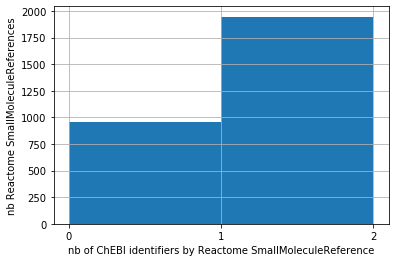

In [16]:
nbMappingsMax = df['nbChEBI'].max()
ax = df['nbChEBI'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of ChEBI identifiers by Reactome SmallMoleculeReference")
ax.set_ylabel("nb Reactome SmallMoleculeReferences")
print("nbMappingsMax: {}".format(nbMappingsMax))

In [20]:
query="""
# distribution of the number of ChEBI identifiers associated to a bp3:SmallMoleculeReference

SELECT ?chebiID (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeRefs)
WHERE {
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
  FILTER (STRSTARTS(?chebiID, "CHEBI:"))
  OPTIONAL {
    ?molecule bp3:entityReference ?moleculeRef .
    ?molecule rdf:type bp3:SmallMolecule .
  }
}
GROUP BY ?chebiID
ORDER BY DESC(?nbMoleculeRefs)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbMoleculeRefs'] = pandas.to_numeric(df['nbMoleculeRefs'])
df

chebiID  nbMoleculeRefs
0      CHEBI:10036               1
1      CHEBI:10093               1
2     CHEBI:104011               1
3      CHEBI:10545               1
4      CHEBI:10723               1
...            ...             ...
1948    CHEBI:9171               1
1949    CHEBI:9254               1
1950    CHEBI:9407               1
1951    CHEBI:9463               1
1952    CHEBI:9534               1

[1953 rows x 2 columns]

nbMappingsMax: 1


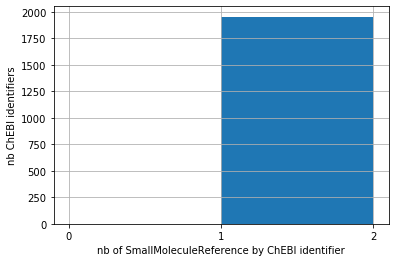

In [21]:
nbMappingsMax = df['nbMoleculeRefs'].max()
ax = df['nbMoleculeRefs'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of SmallMoleculeReference by ChEBI identifier")
ax.set_ylabel("nb ChEBI identifiers")
print("nbMappingsMax: {}".format(nbMappingsMax))

### SmallMolecule -- ChEBI

In [23]:
query="""
# Chebi identifier for a small molecule

#SELECT (COUNT(DISTINCT ?moleculeXref ?chebiID) AS ?nbMappings)
SELECT DISTINCT ?molecule ?chebiID
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

molecule       chebiID
0     http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:65136
1     http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:65136
2     http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:65136
3     http://www.reactome.org/biopax/83/48887#SmallM...    CHEBI:4208
4     http://www.reactome.org/biopax/83/48887#SmallM...    CHEBI:4208
...                                                 ...           ...
3557  http://www.reactome.org/biopax/83/48887#SmallM...  CHEBI:192798
3558  http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:75129
3559  http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:75129
3560  http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:75129
3561  http://www.reactome.org/biopax/83/48887#SmallM...   CHEBI:75129

[3562 rows x 2 columns]

In [8]:
query="""
# SmallMolecules associated to 1+ ChEBI identifier

SELECT (COUNT(DISTINCT ?molecule) AS ?nbSmallMolecules)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbSmallMolecules
0             3562

In [10]:
query="""
# SmallMoleculeReferences associated to 1+ SmallMolecule and 1+ ChEBI identifier

SELECT (COUNT(DISTINCT ?moleculeRef) AS ?nbMoleculeRefs)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculeRefs
0           1946

In [9]:
query="""
# ChEBI identifier associated to 1+ SmallMolecules

SELECT (COUNT(DISTINCT ?chebiID) AS ?nbChEBI)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbChEBI
0    1946

In [15]:
query="""
# small molecules for a ChEBI identifier

SELECT DISTINCT ?molecule ?moleculeXref ?chebiID
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

molecule  \
0  http://www.reactome.org/biopax/77/48887#SmallM...   
1  http://www.reactome.org/biopax/77/48887#SmallM...   

                                        moleculeXref      chebiID  
0  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:16870  
1  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:16870

## Mappings to ChEBI: quantitative analysis

### Number of mappings

In [10]:
query="""
# all mappings between small molecules and a Chebi identifier

SELECT ((COUNT(DISTINCT *)) AS ?nbMappings)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMappings
0       3562

In [11]:
query="""
# number of Reactome small molecules mapped to a Chebi identifier

SELECT ((COUNT(DISTINCT ?molecule)) AS ?nbMappings)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMappings
0       3562

In [11]:
query="""
# number of UnificationXRef between a Reactome small molecules and a Chebi identifier

SELECT ((COUNT(DISTINCT ?moleculeXref)) AS ?nbMappings)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMappings
0       1946

### Number of MoleculeReferences

In [19]:
query="""
# number bp3:MoleculeReference (all may not have a mapping to ChEBI)

SELECT DISTINCT (REPLACE(STR(?moleculeRefType), "http://www.biopax.org/release/biopax-level3.owl#", "") AS ?moleculeRefTypeName)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type ?moleculeRefType .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

moleculeRefTypeName
0  SmallMoleculeReference

In [20]:
query="""
# number bp3:MoleculeReference (all may not have a mapping to ChEBI)

SELECT ((COUNT(DISTINCT ?moleculeRef)) AS ?nbMoleculeReferences)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculeReferences
0                 2903

In [22]:
query="""
# number bp3:MoleculeReference (with a mapping to ChEBI)

SELECT ((COUNT(DISTINCT ?moleculeRef)) AS ?nbMoleculeReferences)
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference ?moleculeRef .
  ?moleculeRef rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMoleculeReferences
0                 1946

### Number of ChEBI molecules

In [12]:
query="""
# number Chebi identifiers mapped to a Reactome small molecule

SELECT ((COUNT(DISTINCT ?chebiID)) AS ?nbMappings)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMappings
0       1946

In [36]:
query="""
# number Chebi identifiers mapped to a Reactome small molecule

SELECT DISTINCT ?moleculeRef1 ?moleculeRef2
WHERE {

  ?moleculeRef1 rdf:type bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID .
  
  ?moleculeRef2 rdf:type bp3:SmallMoleculeReference .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeXref2 bp3:id ?chebiID .
  
  FILTER (?moleculeRef1 < ?moleculeRef2) 
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

Empty DataFrame
Columns: [moleculeRef1, moleculeRef2]
Index: []

### Distribution of the number of mappings for Reactome molecules

In [23]:
query="""
# number Reactome small molecules that do not have a mapping to ChEBI

SELECT ((COUNT(DISTINCT ?molecule)) AS ?nbMolecules)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  FILTER NOT EXISTS {
    ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    ?moleculeXref bp3:id ?chebiID .
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMolecules
0        1521

In [24]:
query="""
# max number of mappings for a small molecule to a Chebi identifier
# each Reactome molecule has at most 1 mapping to an identifier

SELECT ((COUNT(DISTINCT ?moleculeXref)) AS ?nbMappings)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}
GROUP BY ?molecule
ORDER BY DESC(?nbMappings)
LIMIT 1"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbMappings
0          1

In [25]:
query="""
# distribution of the number of mappings to ChEBI for Reactome molecules

SELECT ((COUNT(DISTINCT ?moleculeXref)) AS ?nbMappings)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  OPTIONAL {
    ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    ?moleculeXref bp3:id ?chebiID
  }
}
GROUP BY ?molecule
ORDER BY DESC(?nbMappings)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbMappings'] = pandas.to_numeric(df['nbMappings'])

Text(0, 0.5, 'nb Reactome molecules')

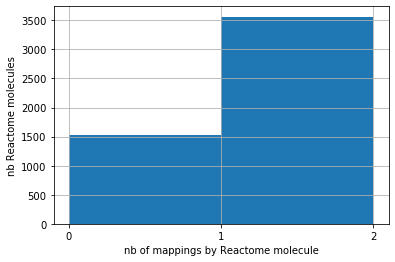

In [26]:
nbMappingsMax = df['nbMappings'].max()
ax = df['nbMappings'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of mappings by Reactome molecule")
ax.set_ylabel("nb Reactome molecules")


In [27]:
query="""
# distribution of the number of mappings to ChEBI for Reactome molecules

SELECT ?chebiID ((COUNT(DISTINCT ?molecule)) AS ?nbMappings)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  #OPTIONAL {
    ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    ?moleculeXref bp3:id ?chebiID
  #}
}
GROUP BY ?chebiID
ORDER BY DESC(?nbMappings)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df['nbMappings'] = pandas.to_numeric(df['nbMappings'])
df

chebiID  nbMappings
0     CHEBI:15378          28
1     CHEBI:29105          21
2     CHEBI:16113          20
3     CHEBI:29108          20
4     CHEBI:15377          18
...           ...         ...
1941   CHEBI:9162           1
1942   CHEBI:9171           1
1943   CHEBI:9407           1
1944   CHEBI:9463           1
1945   CHEBI:9534           1

[1946 rows x 2 columns]

Text(0, 0.5, 'nb ChEBI molecules')

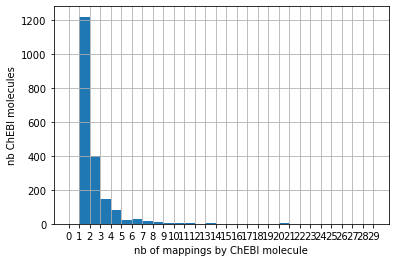

In [28]:
nbMappingsMax = df['nbMappings'].max()
ax = df['nbMappings'].hist(bins=range(nbMappingsMax+2))
ax.set_xticks(range(nbMappingsMax+2))
ax.set_xlabel("nb of mappings by ChEBI molecule")
ax.set_ylabel("nb ChEBI molecules")

In [75]:
query="""
# ChEBI molecules mapped to exactly 1 Reactome molecule

SELECT ?chebiID ((COUNT(DISTINCT ?molecule)) AS ?nbMappings)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  #OPTIONAL {
    ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    ?moleculeXref bp3:id ?chebiID
  #}
}
GROUP BY ?chebiID
HAVING(?nbMappings = 1)
#ORDER BY DESC(?nbMappings)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

chebiID nbMappings
0     CHEBI:58020          1
1     CHEBI:63541          1
2     CHEBI:77028          1
3     CHEBI:18272          1
4     CHEBI:17606          1
...           ...        ...
1100  CHEBI:30913          1
1101  CHEBI:15538          1
1102  CHEBI:63835          1
1103  CHEBI:18384          1
1104  CHEBI:16290          1

[1105 rows x 2 columns]

In [76]:
query="""
# ChEBI molecules mapped to more than 1 Reactome molecule

SELECT ?chebiID ((COUNT(DISTINCT ?molecule)) AS ?nbMappings)
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  #OPTIONAL {
    ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
    ?moleculeXref bp3:db "ChEBI" .
    ?moleculeXref bp3:id ?chebiID
  #}
}
GROUP BY ?chebiID
HAVING(?nbMappings > 1)
#ORDER BY DESC(?nbMappings)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

chebiID nbMappings
0    CHEBI:17823          3
1    CHEBI:15646          2
2    CHEBI:30772          3
3    CHEBI:15996         13
4    CHEBI:60913          2
..           ...        ...
700  CHEBI:17933          4
701  CHEBI:28640          3
702  CHEBI:30031          7
703  CHEBI:17716          2
704  CHEBI:30164          2

[705 rows x 2 columns]

## Generalisation among the ChEBI molecules

In [38]:
query="""
# number bp3:MoleculeReference (with a mapping to ChEBI)

#SELECT DISTINCT ?chebiMolecule1 ?chebiMolecule2
SELECT DISTINCT ?chebiID1 ?molecule1Name  ?chebiID2 ?molecule2Name
WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

chebiID1                molecule1Name     chebiID2  \
0     CHEBI:57330  trans-dodec-2-enoyl-CoA(4-)  CHEBI:77636   
1     CHEBI:57330  trans-dodec-2-enoyl-CoA(4-)  CHEBI:25696   
2     CHEBI:60192          triacyl lipopeptide  CHEBI:16670   
3     CHEBI:60192          triacyl lipopeptide  CHEBI:18059   
4     CHEBI:15940               nicotinic acid  CHEBI:33575   
...           ...                          ...          ...   
2959  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:15489   
2960  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:17984   
2961  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:37240   
2962  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:33447   
2963  CHEBI:15476      2-methylacetoacetyl-CoA  CHEBI:18059   

                     molecule2Name  
0               fatty acyl-CoA(4-)  
1                    organic anion  
2                          peptide  
3                            lipid  
4                  carboxylic acid  
...                            ...  
2959          3-oxo-fatty acyl-CoA  
2960                      acyl-CoA  
2961  adenosine 3',5'-bisphosphate  
2962                 phospho sugar  
2963                         lipid  

[2964 rows x 4 columns]

In [46]:
query="""
#SELECT DISTINCT ?chebiMolecule1 ?chebiMolecule2
#SELECT DISTINCT ?chebiID1 ?molecule1Name  ?chebiID2 ?molecule2Name
SELECT (COUNT(DISTINCT ?chebiID1) AS ?nbDescendants)
#SELECT (COUNT(DISTINCT ?chebiID2) AS ?nbAncestors)

WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)
  
  ?chebiMolecule1 rdfs:subClassOf+ ?chebiMolecule2 .
  BIND(REPLACE(STR(?chebiMolecule2), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiID2)
  ?moleculeXref2 bp3:id ?chebiID2 .
  ?moleculeXref2 bp3:db "ChEBI" .
  ?moleculeRef2 bp3:xref ?moleculeXref2 .
  ?moleculeRef2 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  
  FILTER NOT EXISTS {
    ?chebiMolecule1 rdfs:subClassOf+ ?chebiMoleculeInterm .
    ?chebiMoleculeInterm rdfs:subClassOf+ ?chebiMolecule2 .
    BIND(REPLACE(STR(?chebiMoleculeInterm), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiIDinterm)
    ?moleculeXrefInterm bp3:id ?chebiIDinterm .
    ?moleculeXrefInterm bp3:db "ChEBI" .
    ?moleculeRefInterm bp3:xref ?moleculeXrefInterm .
    ?moleculeRefInterm rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
  
  OPTIONAL { ?chebiMolecule1 rdfs:label ?molecule1Name . }
  OPTIONAL { ?chebiMolecule2 rdfs:label ?molecule2Name . }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbDescendants
0          1277

In [45]:
query="""
#SELECT DISTINCT ?chebiMolecule1 ?chebiMolecule2
#SELECT DISTINCT ?chebiID1 ?molecule1Name  ?chebiID2 ?molecule2Name
SELECT (COUNT(DISTINCT ?chebiID1) AS ?nbLeaves)

WHERE {
  
  ?moleculeRef1 rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  ?moleculeRef1 bp3:xref ?moleculeXref1 .
  ?moleculeXref1 bp3:db "ChEBI" .
  ?moleculeXref1 bp3:id ?chebiID1 .
  
  BIND(IRI(REPLACE(?chebiID1, "CHEBI:", "http://purl.obolibrary.org/obo/CHEBI_")) AS ?chebiMolecule1)

  FILTER NOT EXISTS {
    ?chebiMoleculeDesc rdfs:subClassOf+ ?chebiMolecule1 .
    BIND(REPLACE(STR(?chebiMoleculeDesc), "http://purl.obolibrary.org/obo/CHEBI_", "CHEBI:") AS ?chebiIDdesc)
    ?moleculeXrefDesc bp3:id ?chebiIDdesc .
    ?moleculeXrefDesc bp3:db "ChEBI" .
    ?moleculeRefDesc bp3:xref ?moleculeXrefDesc .
    ?moleculeRefDesc rdf:type/(rdfs:subClassOf*) bp3:SmallMoleculeReference .
  }
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

nbLeaves
0     1835

## Reactome small molecule labels

**Question:** do all the Reactome that are mapped to a ChEBI molecule have the same label?

In [80]:
query="""
# Reactome molecules and their label(s) associated to the same ChEBI molecule

SELECT ?molecule ?moleculeName ?moleculeXref ?chebiID
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  OPTIONAL { ?molecule bp3:displayName ?moleculeName . }
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID
}
ORDER BY ?moleculeXref
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

molecule       moleculeName  \
0     http://www.reactome.org/biopax/77/48887#SmallM...               Fe3+   
1     http://www.reactome.org/biopax/77/48887#SmallM...               Fe3+   
2     http://www.reactome.org/biopax/77/48887#SmallM...               Fe3+   
3     http://www.reactome.org/biopax/77/48887#SmallM...               Fe3+   
4     http://www.reactome.org/biopax/77/48887#SmallM...               Fe3+   
...                                                 ...                ...   
3382  http://www.reactome.org/biopax/77/48887#SmallM...                2AG   
3383  http://www.reactome.org/biopax/77/48887#SmallM...                2AG   
3384  http://www.reactome.org/biopax/77/48887#SmallM...                3AG   
3385  http://www.reactome.org/biopax/77/48887#SmallM...          1,2-daG3P   
3386  http://www.reactome.org/biopax/77/48887#SmallM...  Phosphatidic acid   

                                           moleculeXref      chebiID  
0     http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:29034  
1     http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:29034  
2     http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:29034  
3     http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:29034  
4     http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:29034  
...                                                 ...          ...  
3382  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:52392  
3383  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:52392  
3384  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:75571  
3385  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:29089  
3386  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:29089  

[3387 rows x 4 columns]

In [81]:
query="""
# Reactome molecules and their label(s) associated to the same ChEBI molecule

SELECT ?molecule1 ?moleculeName1 ?molecule2 ?moleculeName2 ?moleculeXref ?chebiID
WHERE {
  ?moleculeXref rdf:type bp3:UnificationXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID .
  ?molecule1 bp3:entityReference/bp3:xref ?moleculeXref .
  ?molecule1 rdf:type bp3:SmallMolecule .
  ?molecule1 bp3:displayName ?moleculeName1 . 
  ?molecule2 bp3:entityReference/bp3:xref ?moleculeXref .
  ?molecule2 rdf:type bp3:SmallMolecule .
  ?molecule2 bp3:displayName ?moleculeName2 . 
  
  FILTER (str(?molecule1) < str(?molecule2))
  FILTER (?moleculeName1 != ?moleculeName2)
  
}
ORDER BY ?moleculeXref
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

molecule1          moleculeName1  \
0    http://www.reactome.org/biopax/77/48887#SmallM...                   CHOL   
1    http://www.reactome.org/biopax/77/48887#SmallM...                   CHOL   
2    http://www.reactome.org/biopax/77/48887#SmallM...                   CHOL   
3    http://www.reactome.org/biopax/77/48887#SmallM...                   CHOL   
4    http://www.reactome.org/biopax/77/48887#SmallM...                   CHOL   
..                                                 ...                    ...   
543  http://www.reactome.org/biopax/77/48887#SmallM...  24-hydroxycholesterol   
544  http://www.reactome.org/biopax/77/48887#SmallM...          Cerebrosterol   
545  http://www.reactome.org/biopax/77/48887#SmallM...          Cerebrosterol   
546  http://www.reactome.org/biopax/77/48887#SmallM...                    DPA   
547  http://www.reactome.org/biopax/77/48887#SmallM...              1,2-daG3P   

                                             molecule2      moleculeName2  \
0    http://www.reactome.org/biopax/77/48887#SmallM...        cholesterol   
1    http://www.reactome.org/biopax/77/48887#SmallM...        cholesterol   
2    http://www.reactome.org/biopax/77/48887#SmallM...        cholesterol   
3    http://www.reactome.org/biopax/77/48887#SmallM...        cholesterol   
4    http://www.reactome.org/biopax/77/48887#SmallM...        cholesterol   
..                                                 ...                ...   
543  http://www.reactome.org/biopax/77/48887#SmallM...          24OH-CHOL   
544  http://www.reactome.org/biopax/77/48887#SmallM...          24OH-CHOL   
545  http://www.reactome.org/biopax/77/48887#SmallM...          24OH-CHOL   
546  http://www.reactome.org/biopax/77/48887#SmallM...             DPAn-3   
547  http://www.reactome.org/biopax/77/48887#SmallM...  Phosphatidic acid   

                                          moleculeXref      chebiID  
0    http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:16113  
1    http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:16113  
2    http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:16113  
3    http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:16113  
4    http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:16113  
..                                                 ...          ...  
543  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:34310  
544  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:34310  
545  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:34310  
546  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:53488  
547  http://www.reactome.org/biopax/77/48887#Unific...  CHEBI:29089  

[548 rows x 6 columns]

## Differences between the Reactome molecules mapped to the same ChEBI molecule

In [29]:
query="""
SELECT DISTINCT ?molecule ?moleculeXref ?chebiID ?moleculeSource ?moleculeLocation
WHERE {
  #VALUES ?molecule { reactome:SmallMolecule2822 }
  #VALUES ?chebiID { "CHEBI:16870" }
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule bp3:entityReference/bp3:xref ?moleculeXref .
  ?moleculeXref bp3:db "ChEBI" .
  ?moleculeXref bp3:id ?chebiID .
  
  OPTIONAL { ?molecule bp3:dataSource ?moleculeSource . }
  OPTIONAL { ?molecule bp3:cellularLocation ?moleculeLocation . }
}
#ORDER BY ?moleculeXref ?molecule
ORDER BY ?moleculeXref ?moleculeLocation"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

molecule  \
0     http://www.reactome.org/biopax/83/48887#SmallM...   
1     http://www.reactome.org/biopax/83/48887#SmallM...   
2     http://www.reactome.org/biopax/83/48887#SmallM...   
3     http://www.reactome.org/biopax/83/48887#SmallM...   
4     http://www.reactome.org/biopax/83/48887#SmallM...   
...                                                 ...   
3557  http://www.reactome.org/biopax/83/48887#SmallM...   
3558  http://www.reactome.org/biopax/83/48887#SmallM...   
3559  http://www.reactome.org/biopax/83/48887#SmallM...   
3560  http://www.reactome.org/biopax/83/48887#SmallM...   
3561  http://www.reactome.org/biopax/83/48887#SmallM...   

                                           moleculeXref      chebiID  \
0     http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:29120   
1     http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:50091   
2     http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:50091   
3     http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:33101   
4     http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:33101   
...                                                 ...          ...   
3557  http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:21615   
3558  http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:41609   
3559  http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:26523   
3560  http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:26523   
3561  http://www.reactome.org/biopax/83/48887#Unific...  CHEBI:26523   

                                         moleculeSource  \
0     http://www.reactome.org/biopax/83/48887#Proven...   
1     http://www.reactome.org/biopax/83/48887#Proven...   
2     http://www.reactome.org/biopax/83/48887#Proven...   
3     http://www.reactome.org/biopax/83/48887#Proven...   
4     http://www.reactome.org/biopax/83/48887#Proven...   
...                                                 ...   
3557  http://www.reactome.org/biopax/83/48887#Proven...   
3558  http://www.reactome.org/biopax/83/48887#Proven...   
3559  http://www.reactome.org/biopax/83/48887#Proven...   
3560  http://www.reactome.org/biopax/83/48887#Proven...   
3561  http://www.reactome.org/biopax/83/48887#Proven...   

                                       moleculeLocation  
0     http://www.reactome.org/biopax/83/48887#Cellul...  
1     http://www.reactome.org/biopax/83/48887#Cellul...  
2     http://www.reactome.org/biopax/83/48887#Cellul...  
3     http://www.reactome.org/biopax/83/48887#Cellul...  
4     http://www.reactome.org/biopax/83/48887#Cellul...  
...                                                 ...  
3557  http://www.reactome.org/biopax/83/48887#Cellul...  
3558  http://www.reactome.org/biopax/83/48887#Cellul...  
3559  http://www.reactome.org/biopax/83/48887#Cellul...  
3560  http://www.reactome.org/biopax/83/48887#Cellul...  
3561  http://www.reactome.org/biopax/83/48887#Cellul...  

[3562 rows x 5 columns]

## TODO

**TODO:**

- [x] possible types for small molecules
    - only `bp3:SmallMolecule`
- [x] difference between `bp3:xref` et `bp3:entityReference`
    - the 2 `bp3:xref` for a small molecule give access to its stable and its release-dependent identifiers in Reactome
    - true for `reactome:SmallMolecule2822`
    - [ ] do all small molecules have these 2 `bp3:xref`?
    - [ ] do some small molecules have more than 2 `bp3:xref`?
- [ ] est-ce que toutes les valeurs de `bp3:entityReference` pour une instance de `bp3:SmallMolecule` sont de type `bp3:SmallMoleculeReference`?

In [7]:
query="""
# All types of small molecules

SELECT DISTINCT ?moleculeType
WHERE {
  ?molecule rdf:type bp3:SmallMolecule .
  ?molecule rdf:type ?moleculeType .
}"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

moleculeType
0  http://www.biopax.org/release/biopax-level3.ow...